#📌 Extracción

In [1]:
import pandas as pd

In [2]:

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

In [3]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

### Normalizacion del DataFrame.

In [4]:
# Lista de columnas con diccionarios anidados
columnas_dicc = ['customer', 'phone', 'internet', 'account']

# Normalizamos cada columna por separado
normalizadas = [pd.json_normalize(df[col]) for col in columnas_dicc]

# Unimos todo en un nuevo DataFrame
df_telecom = pd.concat([df.drop(columns=columnas_dicc)] + normalizadas, axis=1)

df_telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df_telecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Comprobación de inconsistencias.




In [7]:
for col in df_telecom.columns:
        unicos = pd.unique(df_telecom[col])
        print(f"Valores únicos en la columna '{col}':")
        print(unicos)
        print()


Valores únicos en la columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'gender':
['Female' 'Male']

Valores únicos en la columna 'SeniorCitizen':
[0 1]

Valores únicos en la columna 'Partner':
['Yes' 'No']

Valores únicos en la columna 'Dependents':
['Yes' 'No']

Valores únicos en la columna 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en la columna 'PhoneService':
['Yes' 'No']

Valores únicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'Onl

## Estandarización del DataFrame.

In [8]:
# Aplicar .str.lower() a las columnas de tipo 'object'
for col in df_telecom.columns:
    if df_telecom[col].dtype == 'object':
        df_telecom[col] = df_telecom[col].str.lower()

# Mostrar los valores únicos para verificar el cambio
for col in df_telecom.columns:
        unicos = pd.unique(df_telecom[col])
        print(f"Valores únicos en la columna '{col}':")
        print(unicos)
        print()

Valores únicos en la columna 'customerID':
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Valores únicos en la columna 'Churn':
['no' 'yes' '']

Valores únicos en la columna 'gender':
['female' 'male']

Valores únicos en la columna 'SeniorCitizen':
[0 1]

Valores únicos en la columna 'Partner':
['yes' 'no']

Valores únicos en la columna 'Dependents':
['yes' 'no']

Valores únicos en la columna 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en la columna 'PhoneService':
['yes' 'no']

Valores únicos en la columna 'MultipleLines':
['no' 'yes' 'no phone service']

Valores únicos en la columna 'InternetService':
['dsl' 'fiber optic' 'no']

Valores únicos en la columna 'OnlineSecurity':
['no' 'yes' 'no internet service']

Valores únicos en la columna 'Onl

## Tratando las cadenas vacías ('')

In [9]:
# reemplazamos el vacio por nan para tratarlo
import numpy as np

df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)



In [10]:
# reemplazando nan por "no informado"
df_telecom['Churn'] = df_telecom['Churn'].fillna('no informado')

## Agregamos la columna cuentas diarias

In [11]:
df_telecom['Cuentas_Diarias'] = (df_telecom['Charges.Monthly'] / 30).round(2)

## Convertimos valores textuales como "Sí" y "No" en valores binarios (1 y 0)

In [12]:
columnas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling']

# convertimos
df_telecom[columnas_binarias] = df_telecom[columnas_binarias].replace({'yes': 1, 'no': 0})


/tmp/ipython-input-12-4034837855.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom[columnas_binarias] = df_telecom[columnas_binarias].replace({'yes': 1, 'no': 0})


## Corrigiendo el tipo de dato de las columnas.

In [13]:
df_telecom = df_telecom.astype({
             'PhoneService':'int8',
             'SeniorCitizen':'int8',
             'Partner':'int8',
             'Dependents':'int8',
             'PaperlessBilling':'int8',
             'gender':'string',
             'InternetService':'string',
             'Contract':'string',
             'PaymentMethod':'string',

})


In [14]:
#corrigiendo el tipo de dato de las columna charges.total.
df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'], errors='coerce')


## Renombrar columnas y traducir datos.

In [15]:
# Renombrar las columnas
df_telecom.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servicio_telefono',
    'MultipleLines': 'multiples_lineas',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'copia_seguridad_online',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturacion_en_linea',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
}, inplace=True)


In [16]:
# traducir datos de las columnas.
df_telecom['genero'] = df_telecom['genero'].replace({
    'female': 'femenino',
    'male': 'masculino',
})

df_telecom['tipo_contrato'] = df_telecom['tipo_contrato'].replace({
    'month-to-month': 'mensual',
    'one year': 'anual',
    'two year': 'dos anios',
})

df_telecom['metodo_pago'] = df_telecom['metodo_pago'].replace({
    'bank transfer (automatic)': 'transferencia bancaria (automatica)',
    'credit card (automatic)': 'tarjeta de credito (automatica)',
    'electronic check': 'cheque electronico',
    'mailed check': 'cheque por correo',
})

In [17]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7267 non-null   object 
 1   churn                    7267 non-null   object 
 2   genero                   7267 non-null   string 
 3   adulto_mayor             7267 non-null   int8   
 4   pareja                   7267 non-null   int8   
 5   dependientes             7267 non-null   int8   
 6   meses_contrato           7267 non-null   int64  
 7   servicio_telefono        7267 non-null   int8   
 8   multiples_lineas         7267 non-null   object 
 9   servicio_internet        7267 non-null   string 
 10  seguridad_online         7267 non-null   object 
 11  copia_seguridad_online   7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  StreamingTV             

#📊 Carga y análisis

## Análisis general

In [18]:
df_telecom.describe(include='all')

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,multiples_lineas,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,StreamingTV,StreamingMovies,tipo_contrato,facturacion_en_linea,metodo_pago,cargos_mensuales,cargos_totales,Cuentas_Diarias
count,7267,7267.0,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.0,7267,...,7267.0,7267.0,7267.0,7267.0,7267,7267.000000,7267,7267.000000,7256.000000,7267.000000
unique,7267,3.0,2,NaN,NaN,NaN,NaN,NaN,3.0,3,...,3.0,3.0,3.0,3.0,3,NaN,4,NaN,NaN,NaN
top,9995-hotoh,0.0,masculino,NaN,NaN,NaN,NaN,NaN,0.0,fiber optic,...,0.0,0.0,0.0,0.0,mensual,NaN,cheque electronico,NaN,NaN,NaN
freq,1,5174.0,3675,NaN,NaN,NaN,NaN,NaN,3495.0,3198,...,3195.0,3582.0,2896.0,2870.0,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,64.720098,2280.634213,2.157292
std,NaN,NaN,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,30.129572,2268.632997,1.004407
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,18.800000,0.610000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.425000,400.225000,1.180000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.300000,1391.000000,2.340000
75%,NaN,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.875000,3785.300000,2.995000


## Distribución de la evasión.

In [19]:
df_telecom['churn'].value_counts()


,count
churn,
0,5174
1,1869
no informado,224


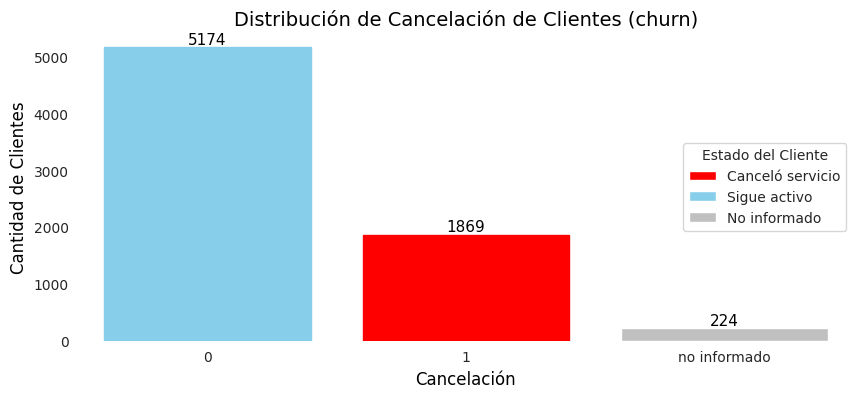

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


sns.set_style('white')

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_frame_on(False)

sns.countplot(x='churn', data=df_telecom, color='silver', ax=ax)
ax.patches[0].set_color('skyblue')
ax.patches[1].set_color('red')
ax.set_title('Distribución de Cancelación de Clientes (churn)', fontsize=14, color='black')
ax.set_xlabel('Cancelación', fontsize=12, color='black')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, color='black')


for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}', (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=11, color='black')

    leyenda = [
    Patch(facecolor='red', label='Canceló servicio'),
    Patch(facecolor='skyblue', label='Sigue activo'),
    Patch(facecolor='silver', label='No informado')]

ax.legend(handles=leyenda, title='Estado del Cliente', loc='right')

plt.savefig('churn.png', dpi=300, bbox_inches='tight')

plt.show()





## Distribucion por variables categóricas.


 Distribución de churn según 'adulto_mayor':

churn            0     1  no informado
adulto_mayor                          
0             74.1  22.9           3.0
1             56.3  40.3           3.4


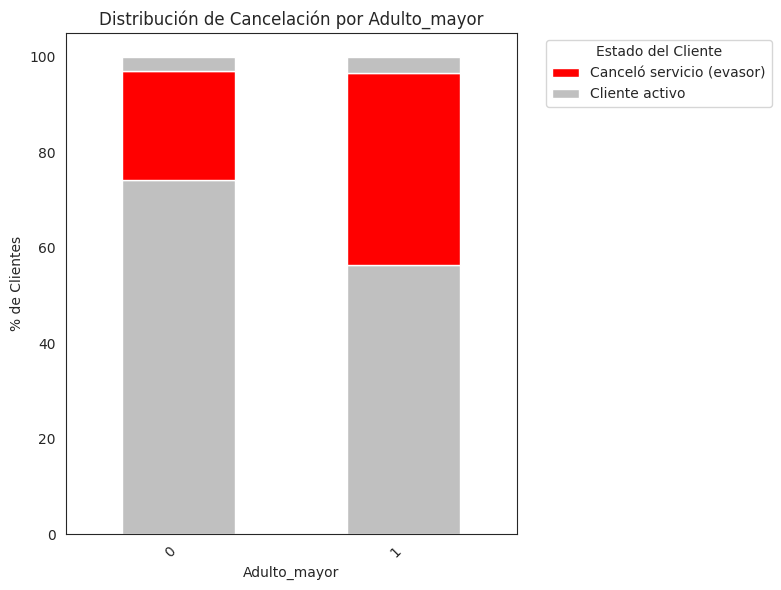


 Distribución de churn según 'tipo_contrato':

churn             0     1  no informado
tipo_contrato                          
anual          86.0  10.9           3.0
dos anios      94.5   2.8           2.8
mensual        55.4  41.3           3.2


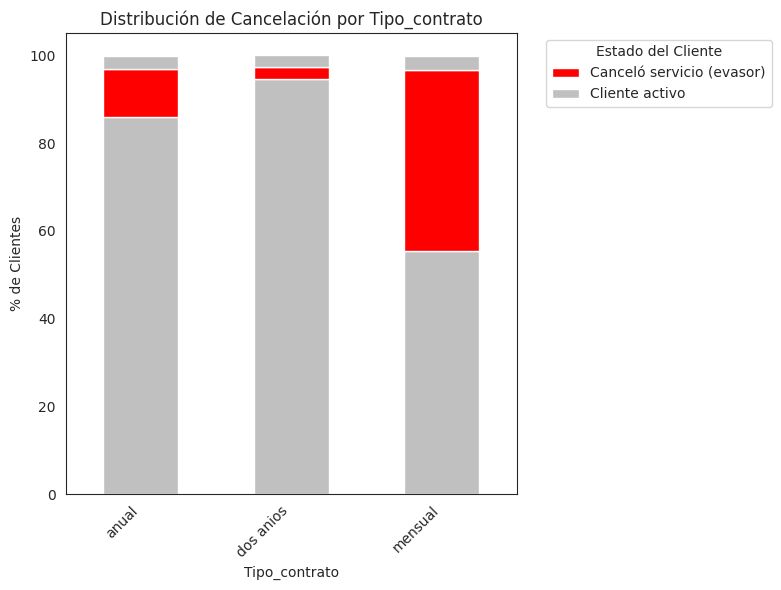


 Distribución de churn según 'metodo_pago':

churn                                   0     1  no informado
metodo_pago                                                  
cheque electronico                   52.9  43.8           3.3
cheque por correo                    78.3  18.5           3.2
tarjeta de credito (automatica)      82.3  14.8           2.9
transferencia bancaria (automatica)  80.9  16.2           2.8


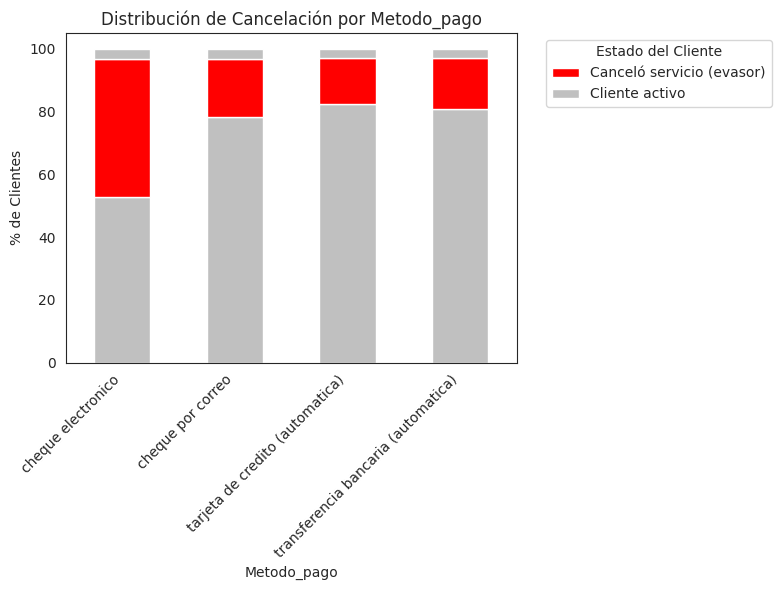


 Distribución de churn según 'facturacion_en_linea':

churn                    0     1  no informado
facturacion_en_linea                          
0                     81.3  15.9           2.8
1                     64.3  32.5           3.2


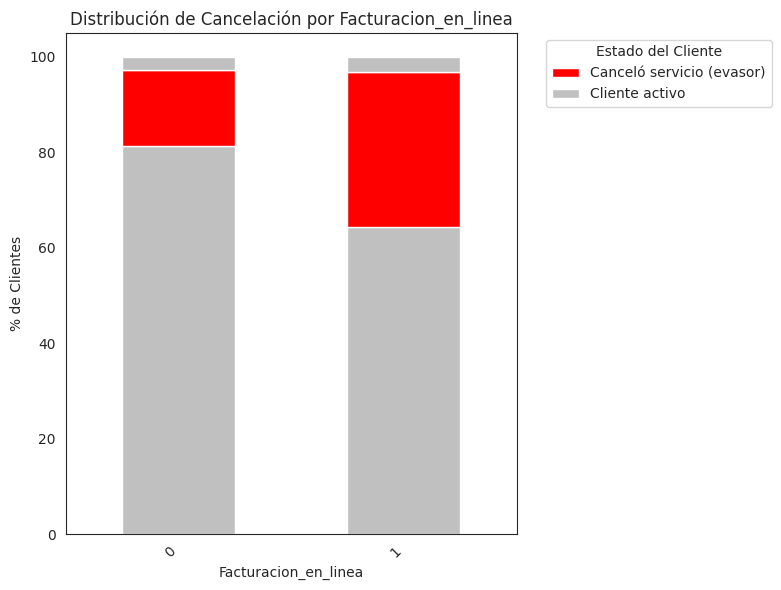


 Distribución de churn según 'servicio_internet':

churn                 0     1  no informado
servicio_internet                          
dsl                78.9  18.4           2.7
fiber optic        56.3  40.6           3.2
no                 89.4   7.1           3.5


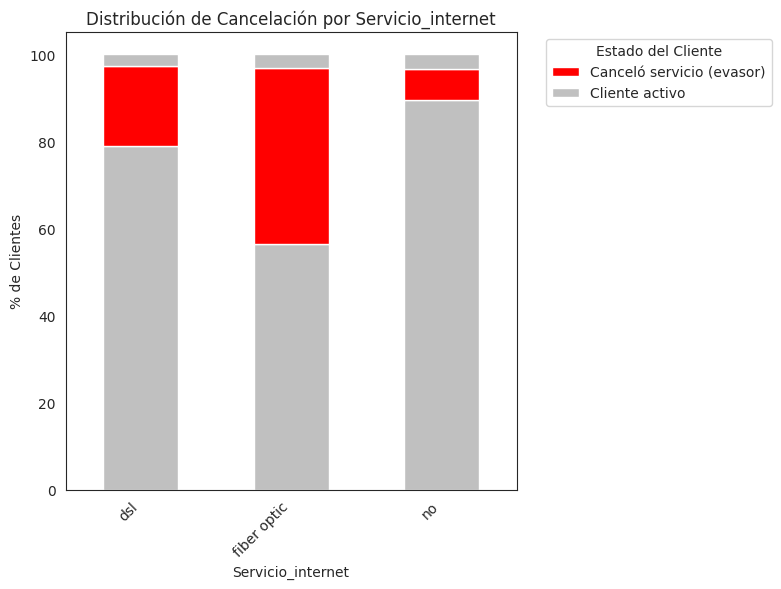


 Distribución de churn según 'pareja':

churn      0     1  no informado
pareja                          
0       65.1  32.0           2.9
1       77.7  19.0           3.3


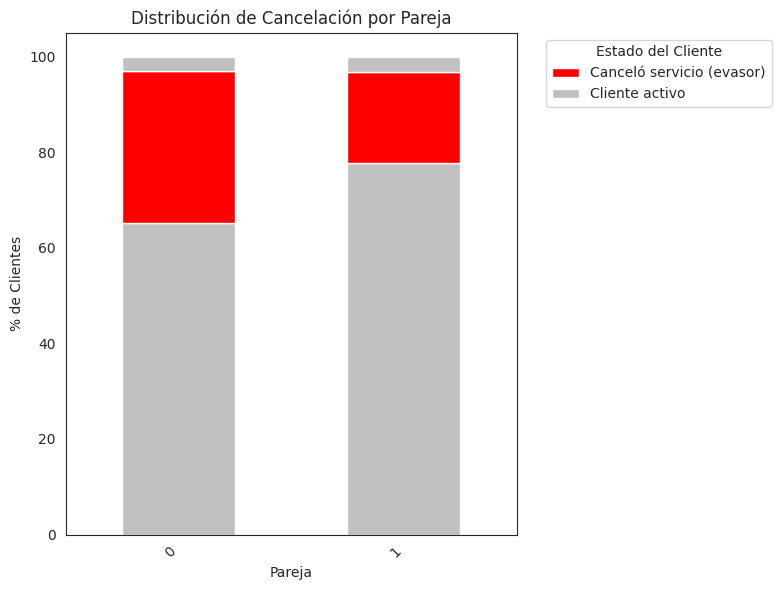


 Distribución de churn según 'dependientes':

churn            0     1  no informado
dependientes                          
0             66.7  30.3           3.0
1             81.8  14.9           3.3


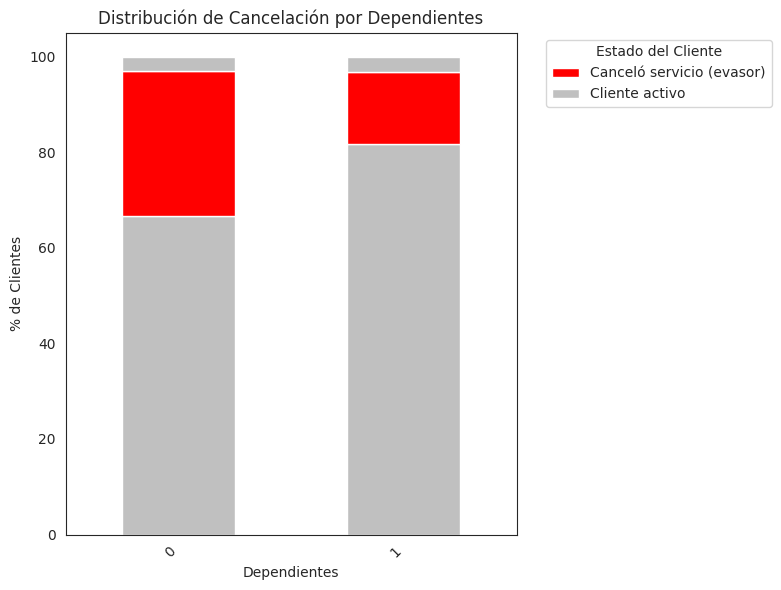

In [21]:
variables_categoricas = [
    'adulto_mayor',
    'tipo_contrato',
    'metodo_pago',
    'facturacion_en_linea',
    'servicio_internet',
    'pareja',
    'dependientes'
]

for var in variables_categoricas:
    print(f"\n Distribución de churn según '{var}':\n")

    # Tabla de porcentaje por grupo
    tabla = df_telecom.groupby(var)['churn'].value_counts(normalize=True).unstack().round(3) * 100
    print(tabla)

    fig, ax = plt.subplots(figsize=(8, 6))
    tabla.plot(kind='bar', stacked=True, color=['silver', 'red'], ax=ax)
    ax.set_title(f"Distribución de Cancelación por {var.capitalize()}")
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel("% de Clientes")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Leyenda personalizada
    leyenda_personalizada = [
        Patch(facecolor='red', label='Canceló servicio (evasor)'),
        Patch(facecolor='silver', label='Cliente activo')
    ]

    # Mover la leyenda fuera del cuadro
    ax.legend(handles=leyenda_personalizada, title='Estado del Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'{var}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


## distribución por variables numéricas.

In [22]:
variables_numericas = [
    'meses_contrato',
    'cargos_mensuales',
    'cargos_totales',
    'Cuentas_Diarias'
]

df_filtrado = df_telecom[df_telecom['churn'].isin([0, 1])].copy()

for var in variables_numericas:
    print(f"\n Porcentaje de churn según rangos de '{var}':\n")

    # Crear rangos
    df_filtrado[f'{var}_rango'] = pd.cut(df_filtrado[var], bins=5)

    # Calcular porcentaje por rango
    tabla = df_filtrado.groupby(f'{var}_rango', observed=True)['churn']\
                       .value_counts(normalize=True).unstack().round(2) * 100
    print(tabla)



 Porcentaje de churn según rangos de 'meses_contrato':

churn                    0     1
meses_contrato_rango            
(-0.072, 14.4]        54.0  46.0
(14.4, 28.8]          74.0  26.0
(28.8, 43.2]          78.0  22.0
(43.2, 57.6]          85.0  15.0
(57.6, 72.0]          93.0   7.0

 Porcentaje de churn según rangos de 'cargos_mensuales':

churn                      0     1
cargos_mensuales_rango            
(18.15, 38.35]          89.0  11.0
(38.35, 58.45]          73.0  27.0
(58.45, 78.55]          71.0  29.0
(78.55, 98.65]          63.0  37.0
(98.65, 118.75]         70.0  30.0

 Porcentaje de churn según rangos de 'cargos_totales':

churn                    0     1
cargos_totales_rango            
(10.134, 1752.0]      67.0  33.0
(1752.0, 3485.2]      75.0  25.0
(3485.2, 5218.4]      84.0  16.0
(5218.4, 6951.6]      85.0  15.0
(6951.6, 8684.8]      89.0  11.0

 Porcentaje de churn según rangos de 'Cuentas_Diarias':

churn                     0     1
Cuentas_Diarias_rango       

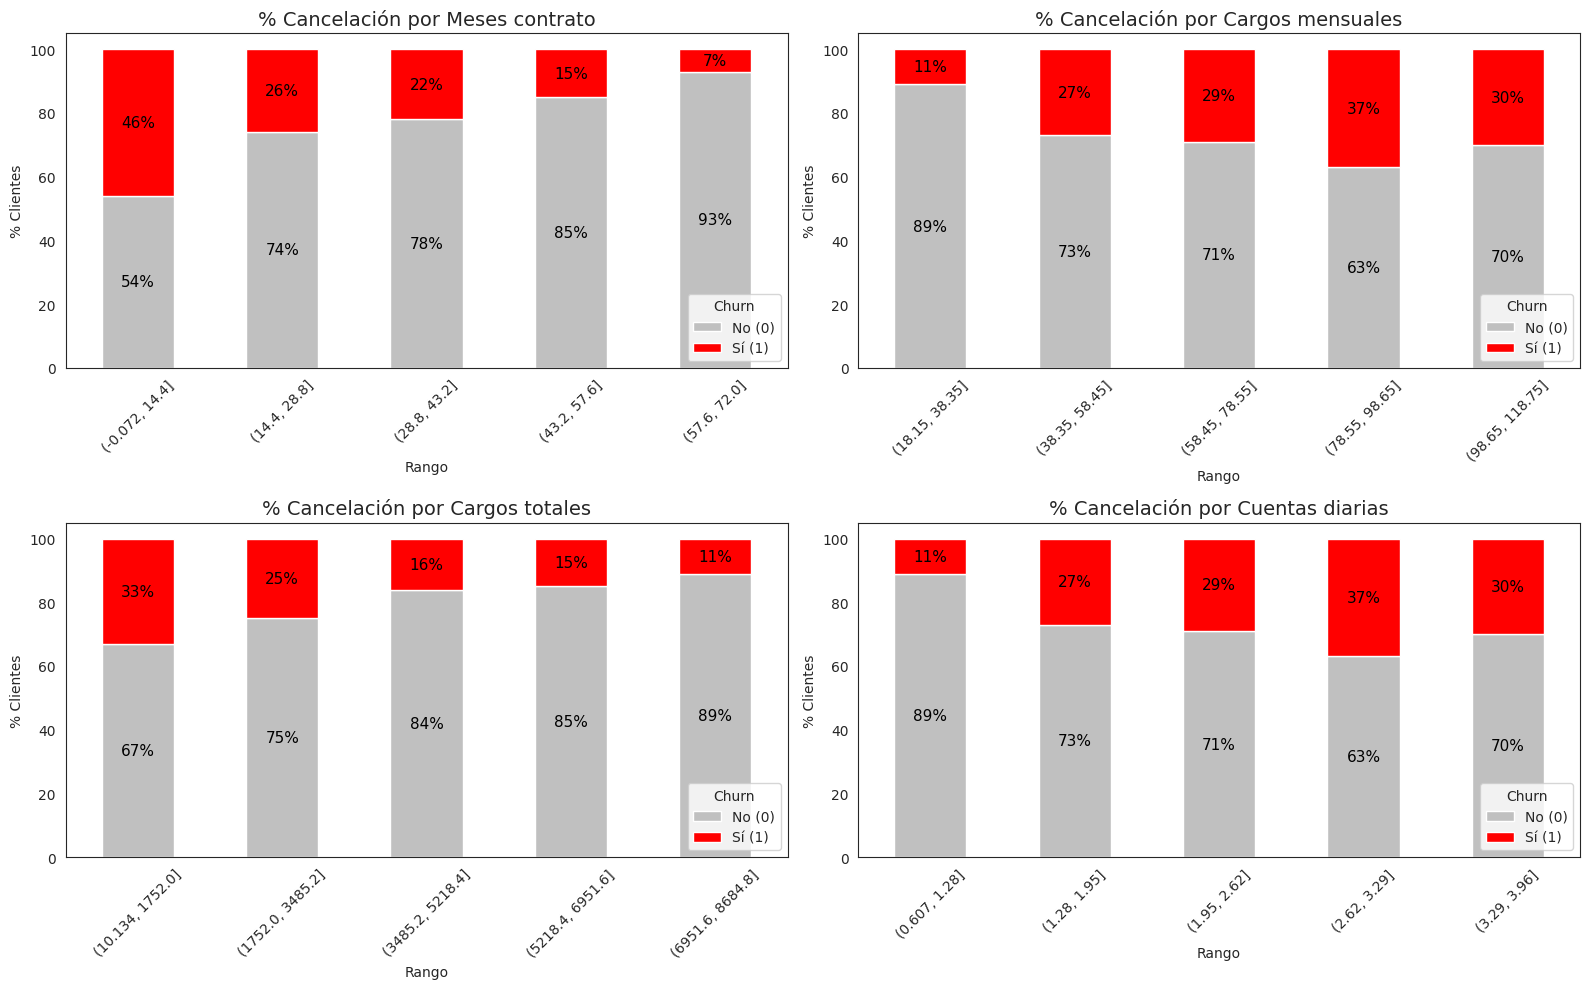

In [23]:
variables_numericas = [
    'meses_contrato',
    'cargos_mensuales',
    'cargos_totales',
    'Cuentas_Diarias'
]

df_filtrado = df_telecom[df_telecom['churn'].isin([0, 1])].copy()

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5,wspace=0.2)
axs = axs.flatten()

for idx, var in enumerate(variables_numericas):
    col_rango = f'{var}_rango'
    df_filtrado[col_rango] = pd.cut(df_filtrado[var], bins=5)

    tabla = df_filtrado.groupby(col_rango, observed=True)['churn']\
                       .value_counts(normalize=True).unstack().round(2) * 100
    tabla = tabla[[0, 1]]  # orden: no (0), sí (1)

    ax = axs[idx]
    tabla.plot(kind='bar', stacked=True, ax=ax, color=['silver', 'red'])
    ax.set_title(f'% Cancelación por {var.replace("_", " ").capitalize()}', fontsize=14)
    ax.set_ylabel('% Clientes')
    ax.set_xlabel('Rango')
    ax.legend(title='Churn', labels=['No (0)', 'Sí (1)'], loc='lower right')
    ax.tick_params(axis='x', rotation=45)

    # Agregar porcentajes dentro de las barras
    for i, container in enumerate(ax.containers):
        for bar in container:
            altura = bar.get_height()
            if altura > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + altura / 2,
                    f'{altura:.0f}%',
                    ha='center',
                    va='center',
                    fontsize=11,
                    color='black'
                )

plt.savefig('porcentajes.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



#📄Informe final

## Introduccion

En este análisis se aborda el problema de la evasión de clientes (Churn) en una empresa de telecomunicaciones.
El objetivo principal es identificar los factores que inciden en la cancelación del servicio por parte de los clientes, utilizando análisis exploratorios y visualizaciones. Esto permitirá generar recomendaciones orientadas a reducir la tasa de cancelación y mejorar la retención.

## Limpieza y Tratamiento de Datos

Se siguieron estos pasos:

**Importación**:

-- Se cargó el archivo .json desde una URL pública usando pandas.read_json().

**Estructuración**:

-- El archivo tenía campos anidados (diccionarios), por lo cual se utilizó pd.json_normalize() para desanidar columnas como customer, phone, internet, account.

**Renombrado de columnas**:

-- Se tradujeron nombres a español (ej. SeniorCitizen → adulto_mayor).

**Conversión de datos**:

-- Se pasaron a minúsculas los datos para estandarizarlos.

-- Se pasaron los campos de texto 'yes'/'no' a binarios (1/0).

-- Se transformaron columnas como 'Charges.Total' a tipo float, limpiando espacios y caracteres inválidos.

-- Se creó una columna nueva Cuentas_Diarias (cargos_mensuales / 30).

**Tratamiento de valores ausente**s:

-- Se identificaron y reemplazaron valores faltantes en churn con “no informado” o NaN.

-- Se decidió conservar esos casos para análisis futuros.

 ## Análisis Exploratorio de Datos

**A. Distribución general del Churn**

-- Se utilizó un gráfico de barras con anotaciones para mostrar la cantidad de clientes que cancelaron vs. los que permanecieron.

-- Resultado: la mayoría no canceló, pero una porción significativa sí lo hizo (25-30%).

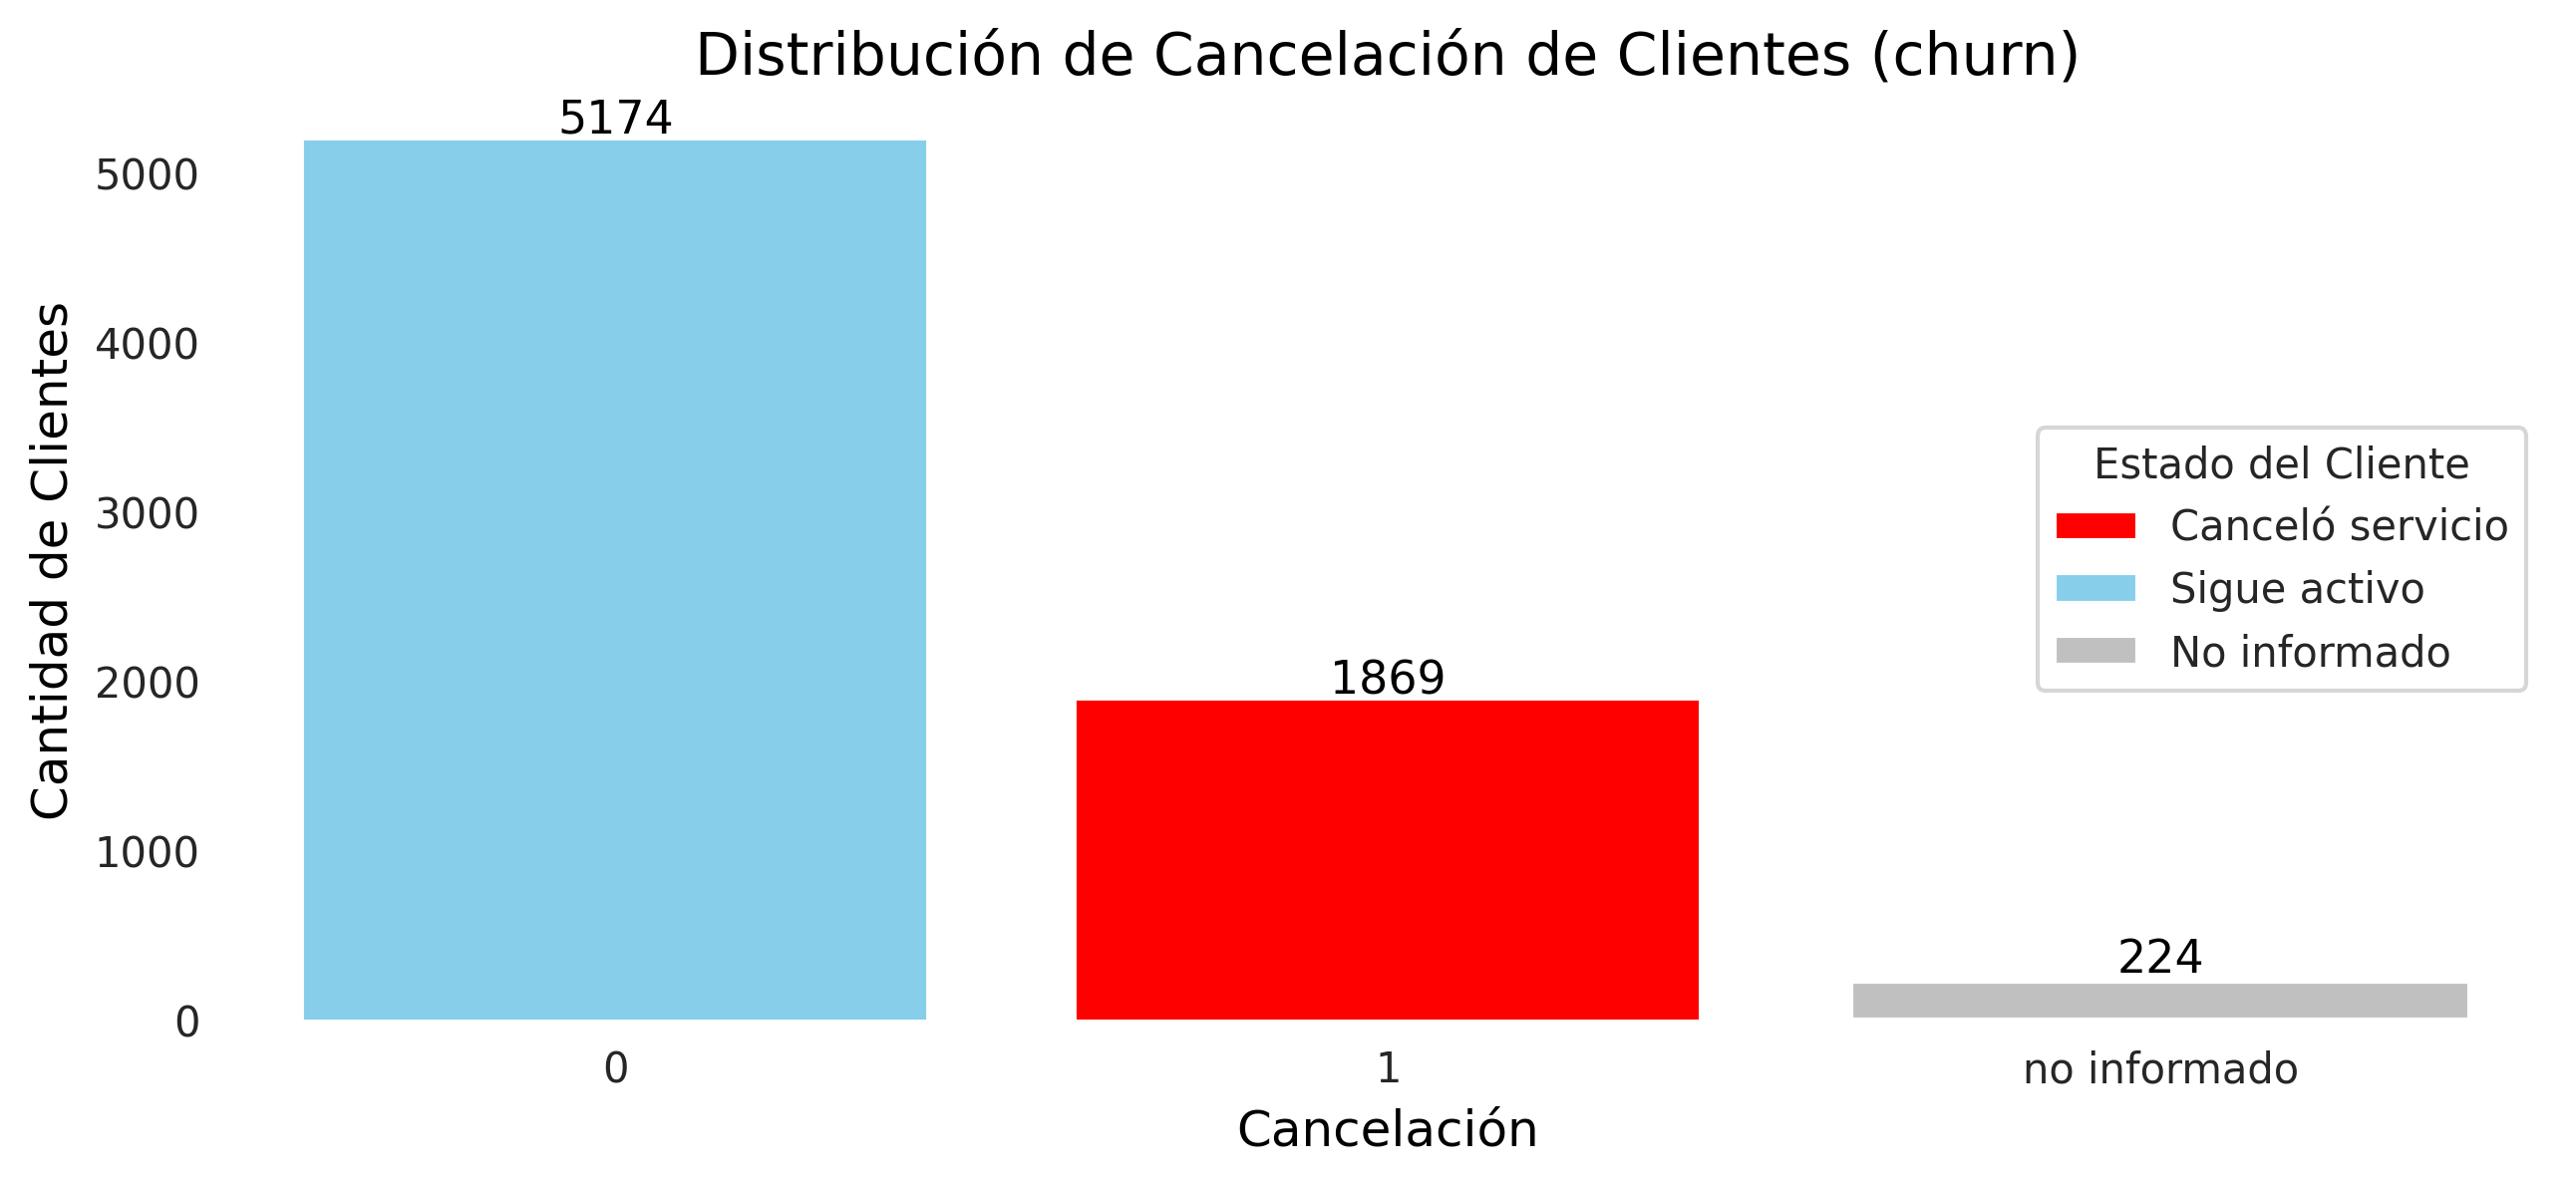

In [24]:
from IPython.display import Image
Image('churn.png')

**B. Churn según variables categóricas**

-- Se analizaron variables como:

-- adulto_mayor, tipo_contrato, pareja, servicio_internet, metodo_pago, etc.

-- Se utilizaron:

-- Gráficos de barras apiladas para comparar el % de cancelación según cada categoría.

-- Se anotaron los valores en las barras para mayor claridad.

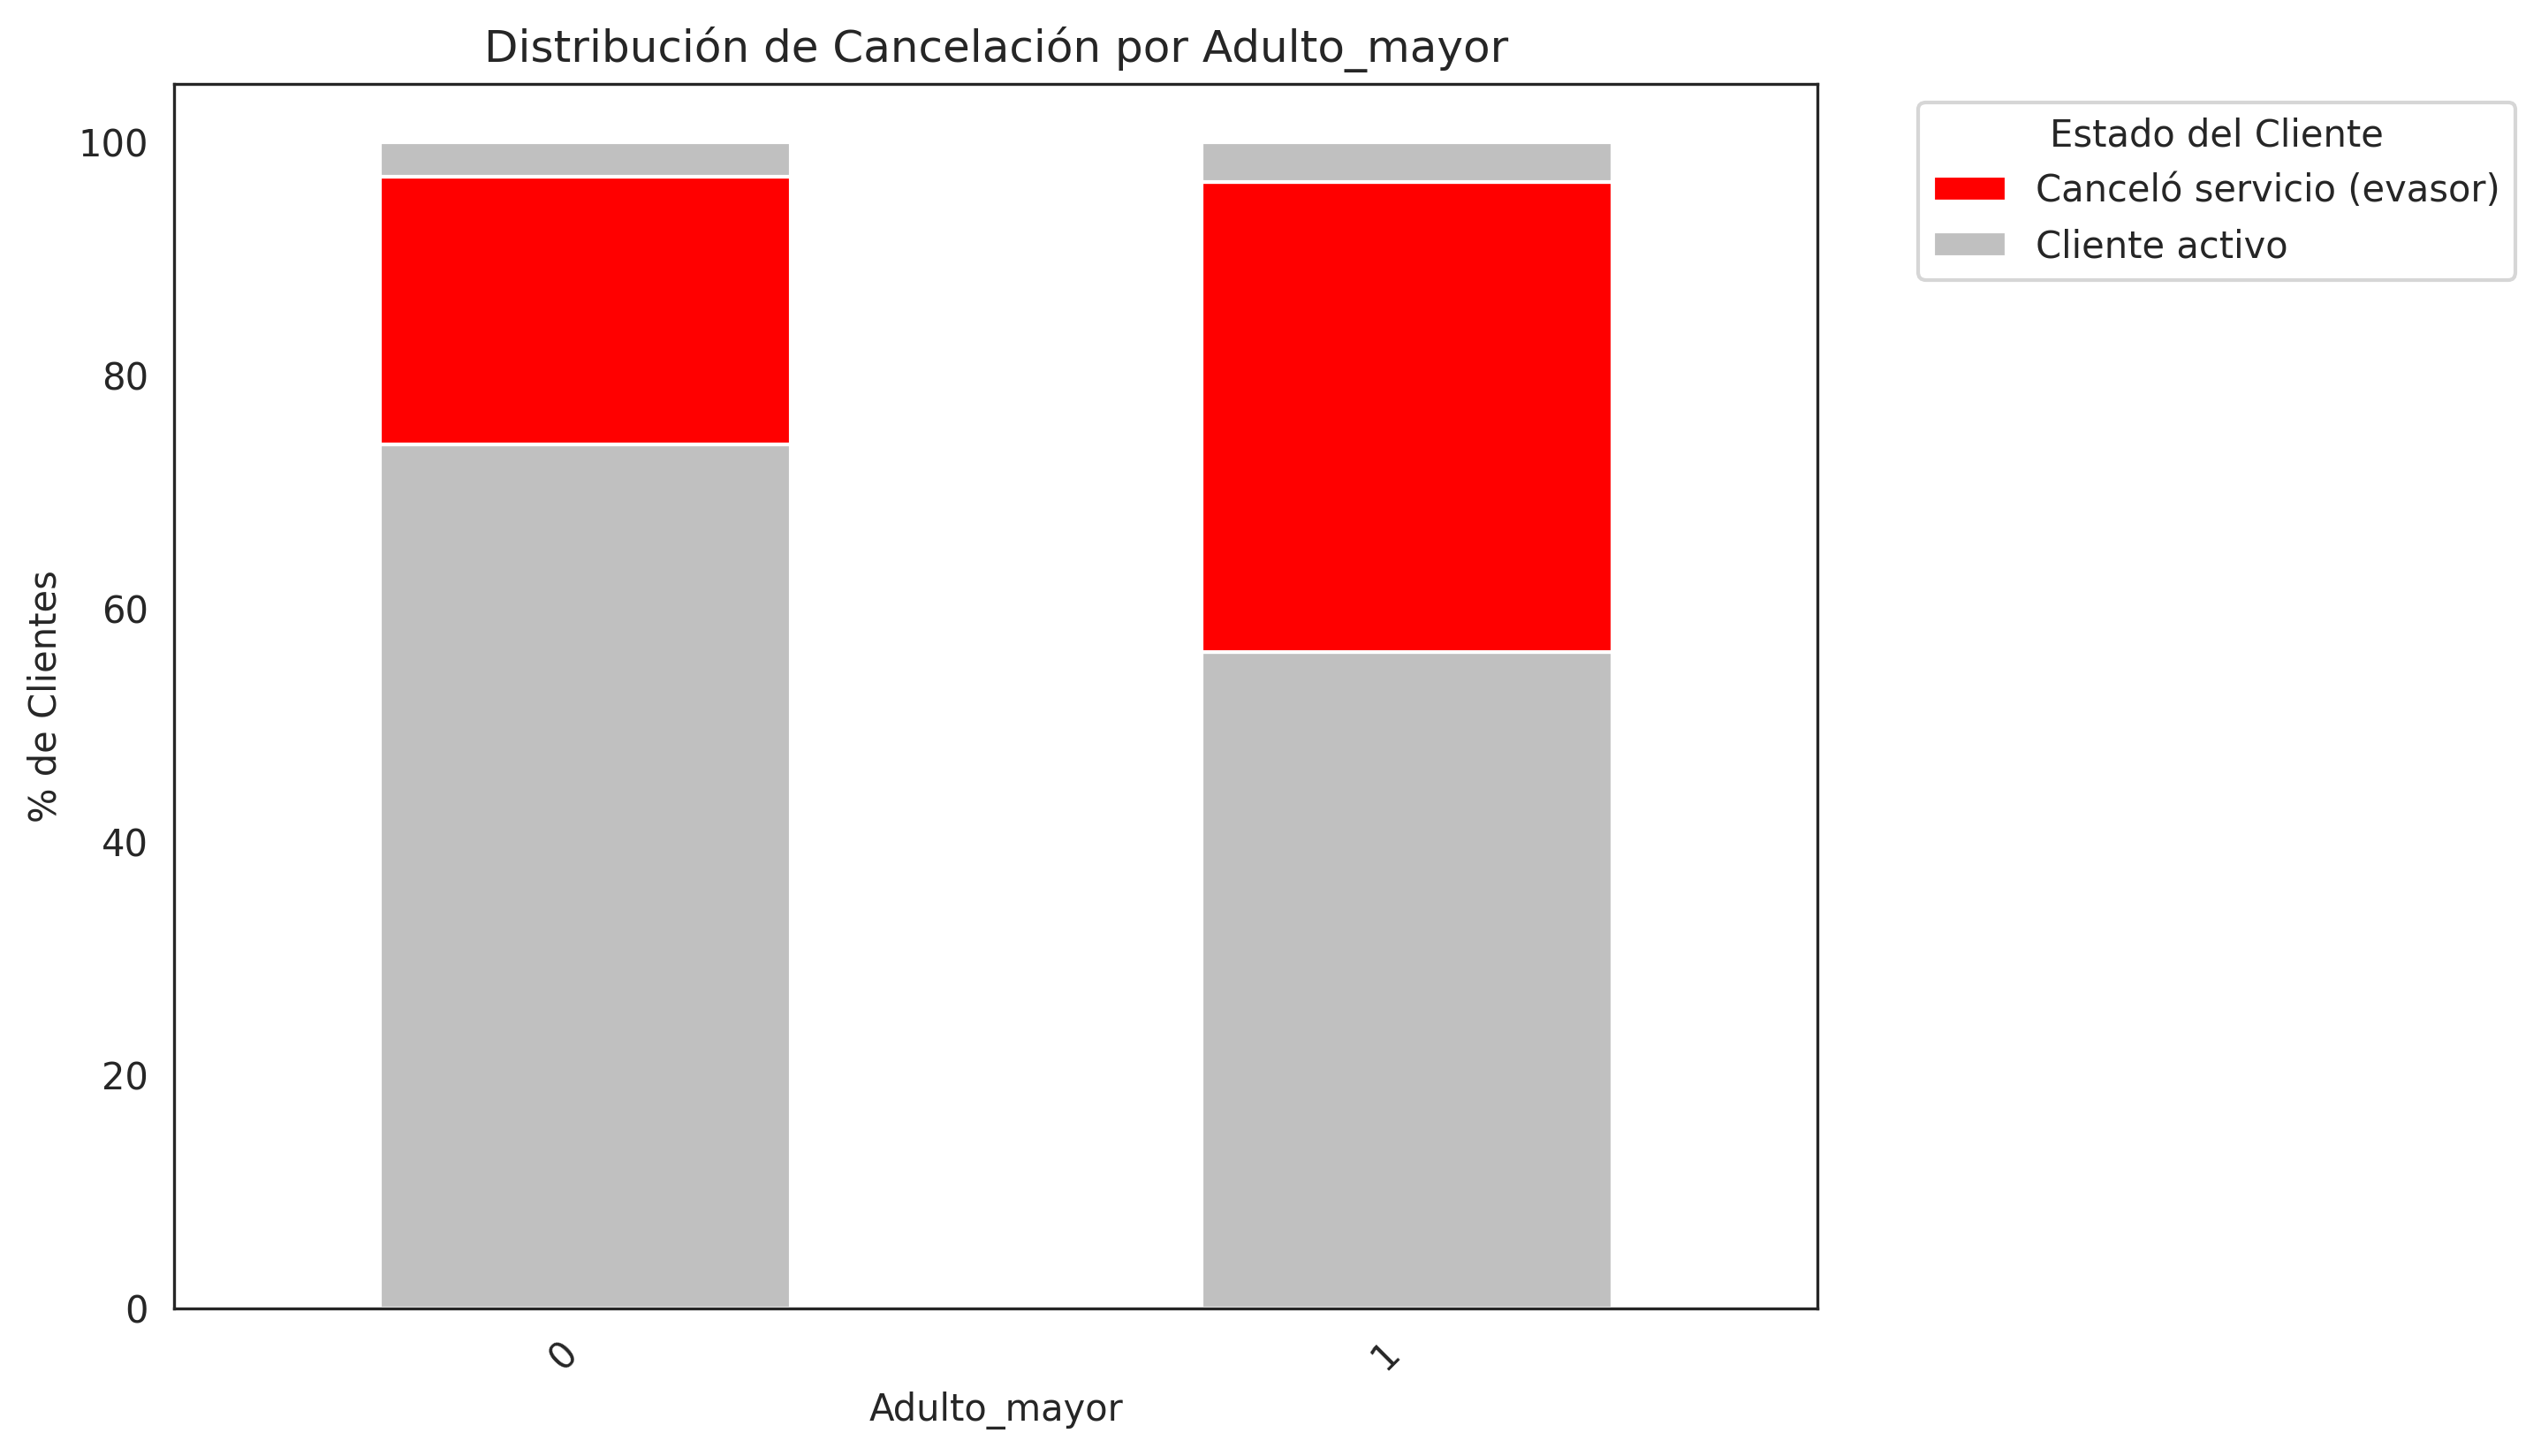

In [25]:
Image('adulto_mayor.png')

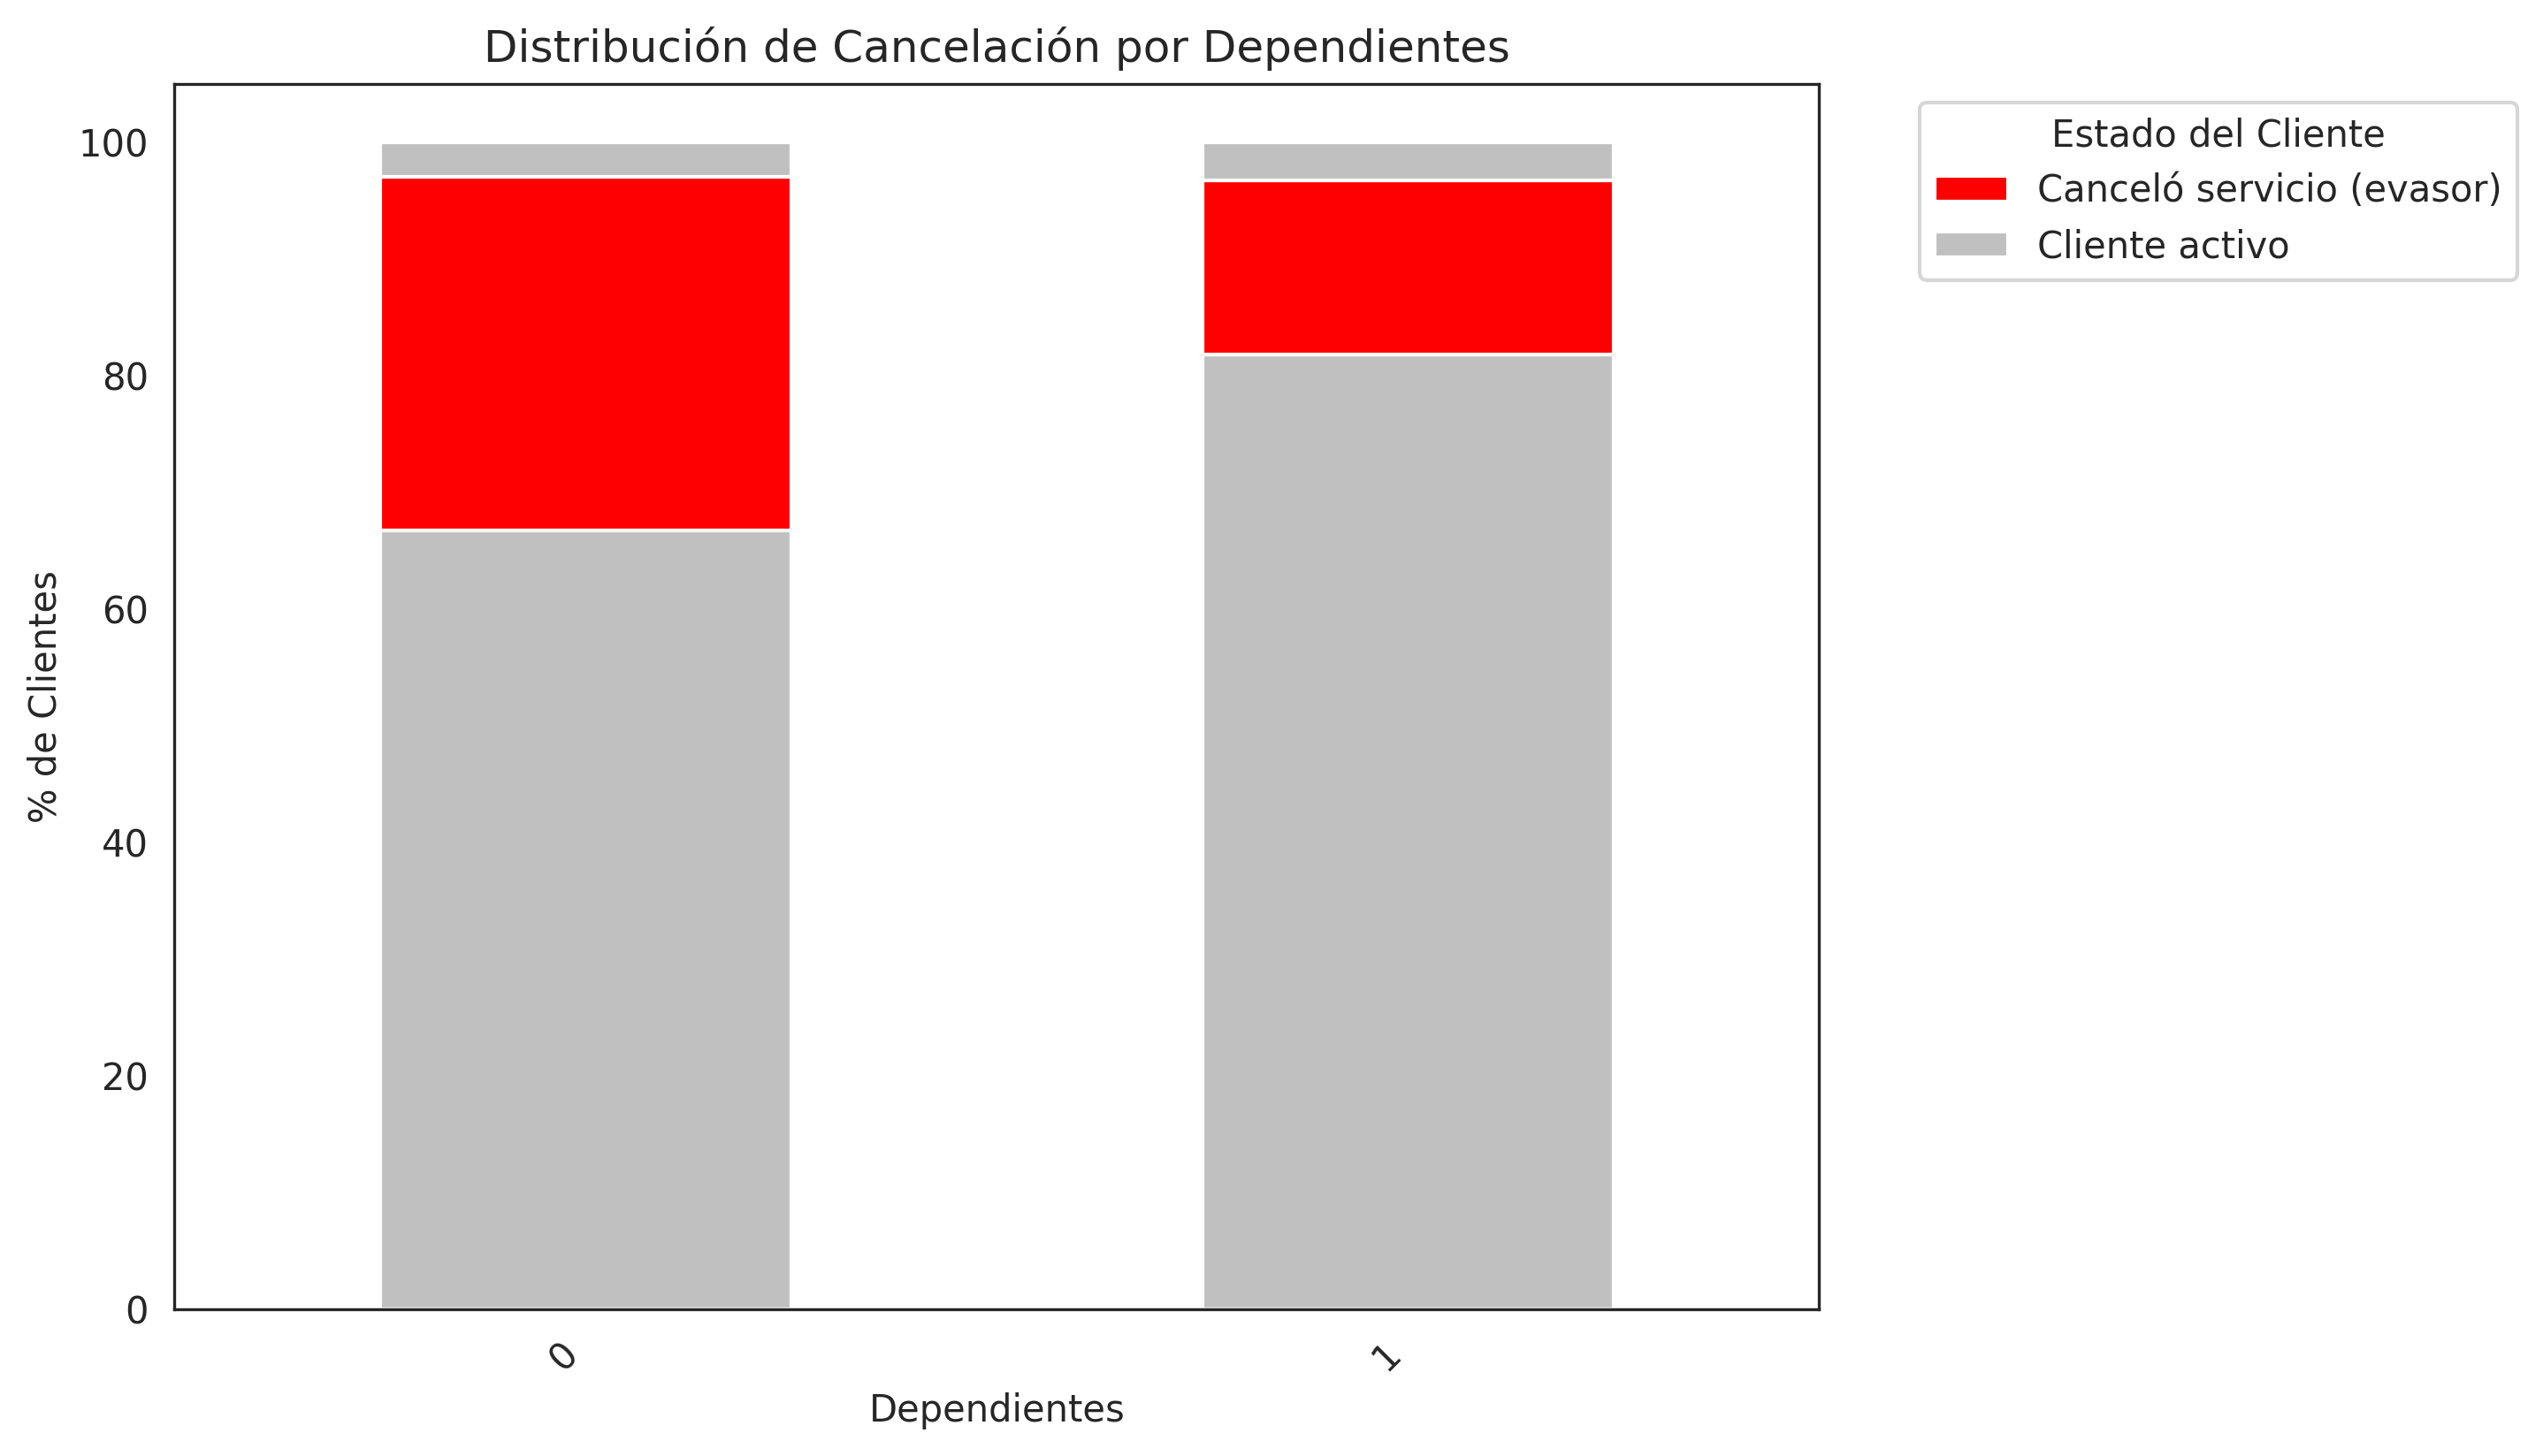

In [26]:
Image('dependientes.png')

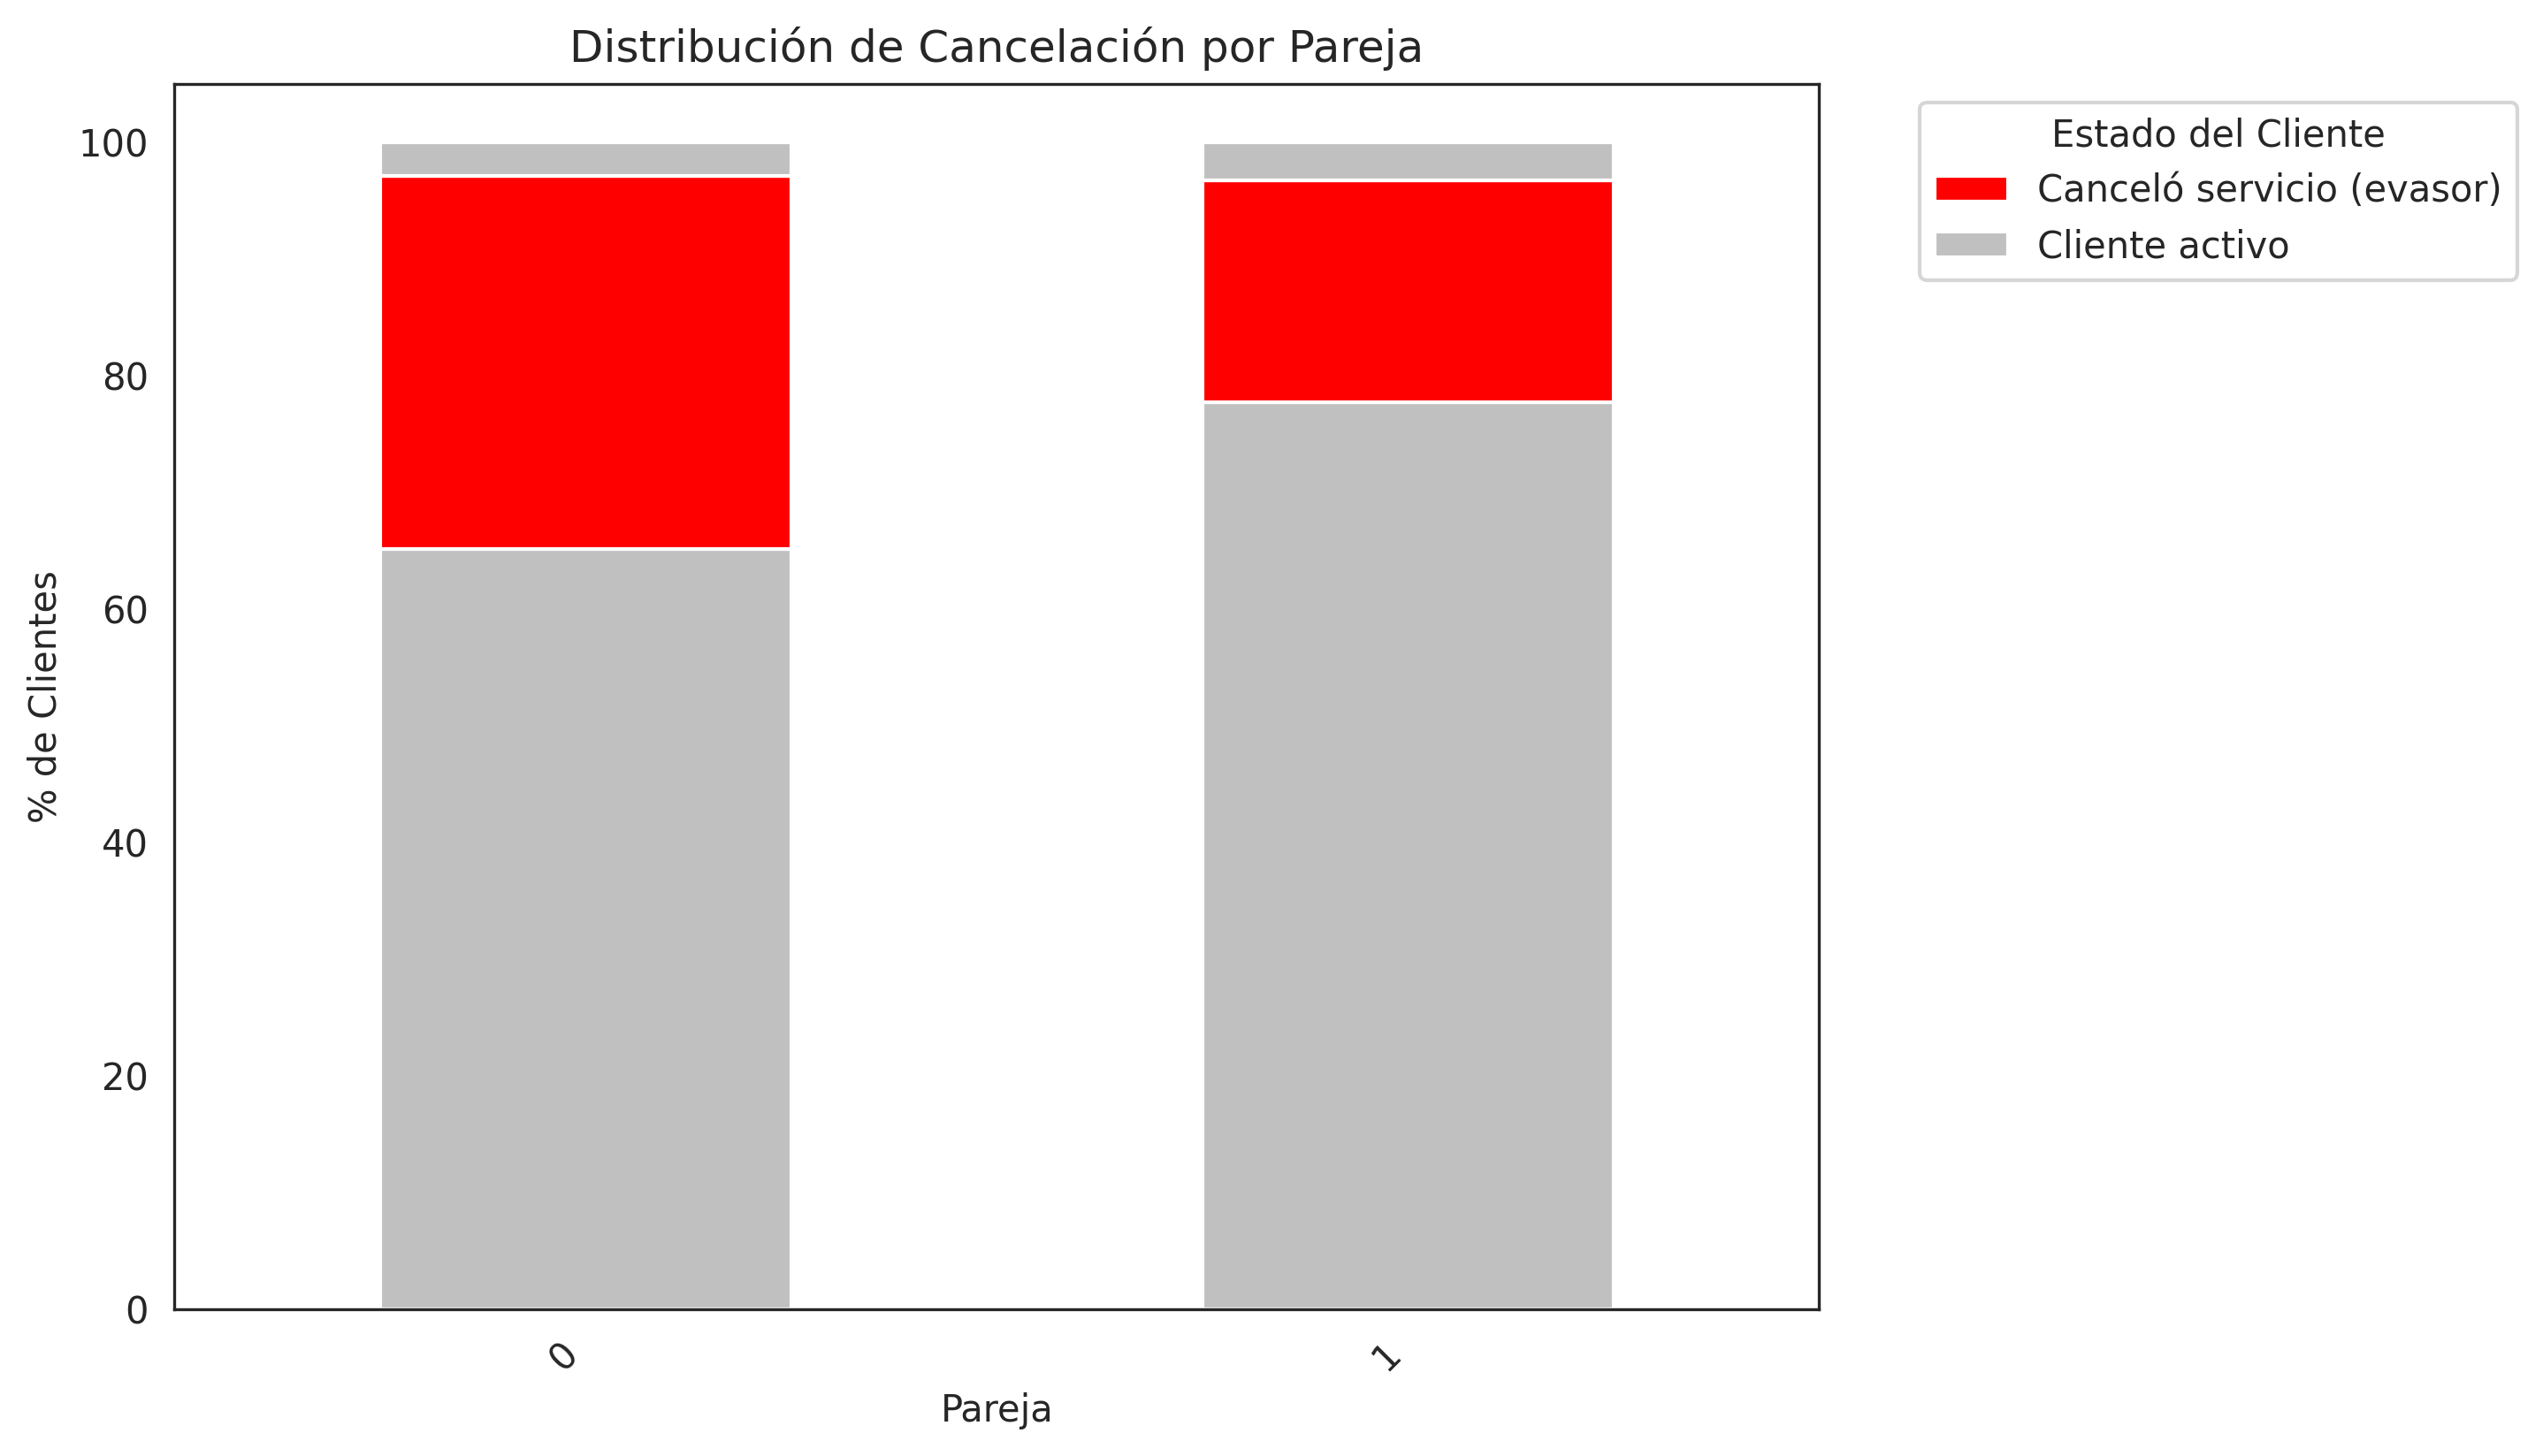

In [27]:
Image('pareja.png')

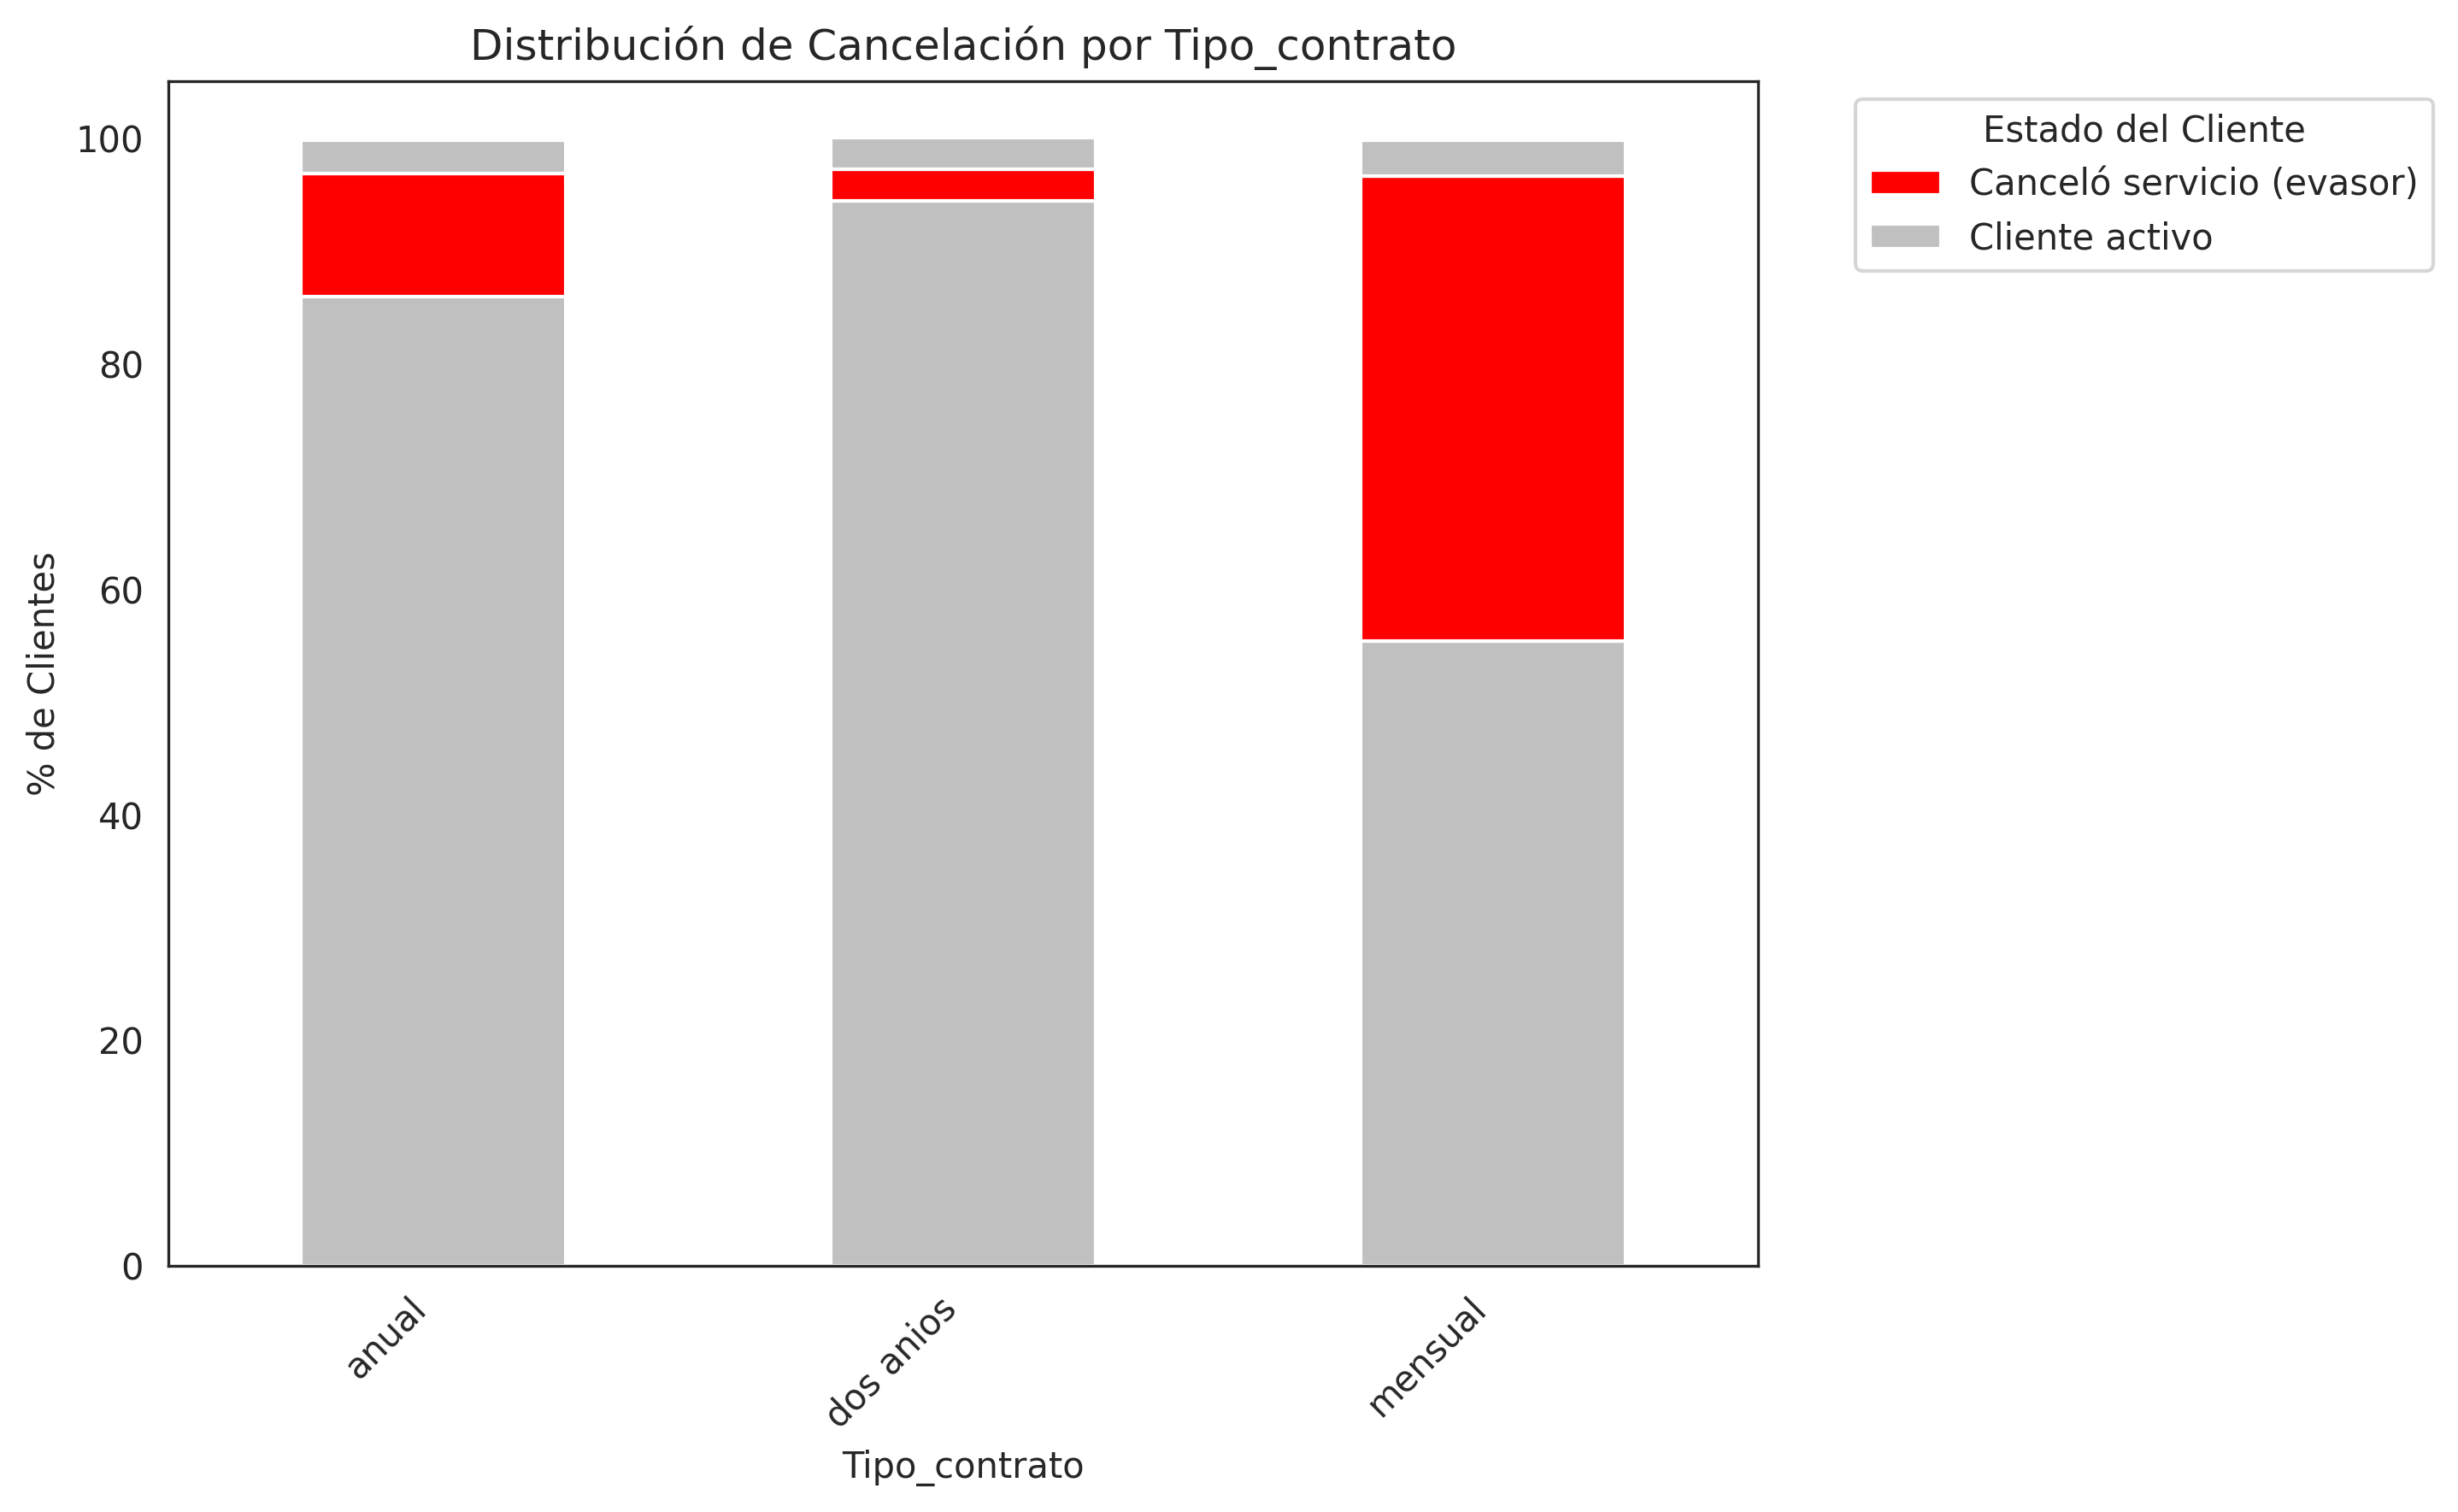

In [28]:
Image('tipo_contrato.png')

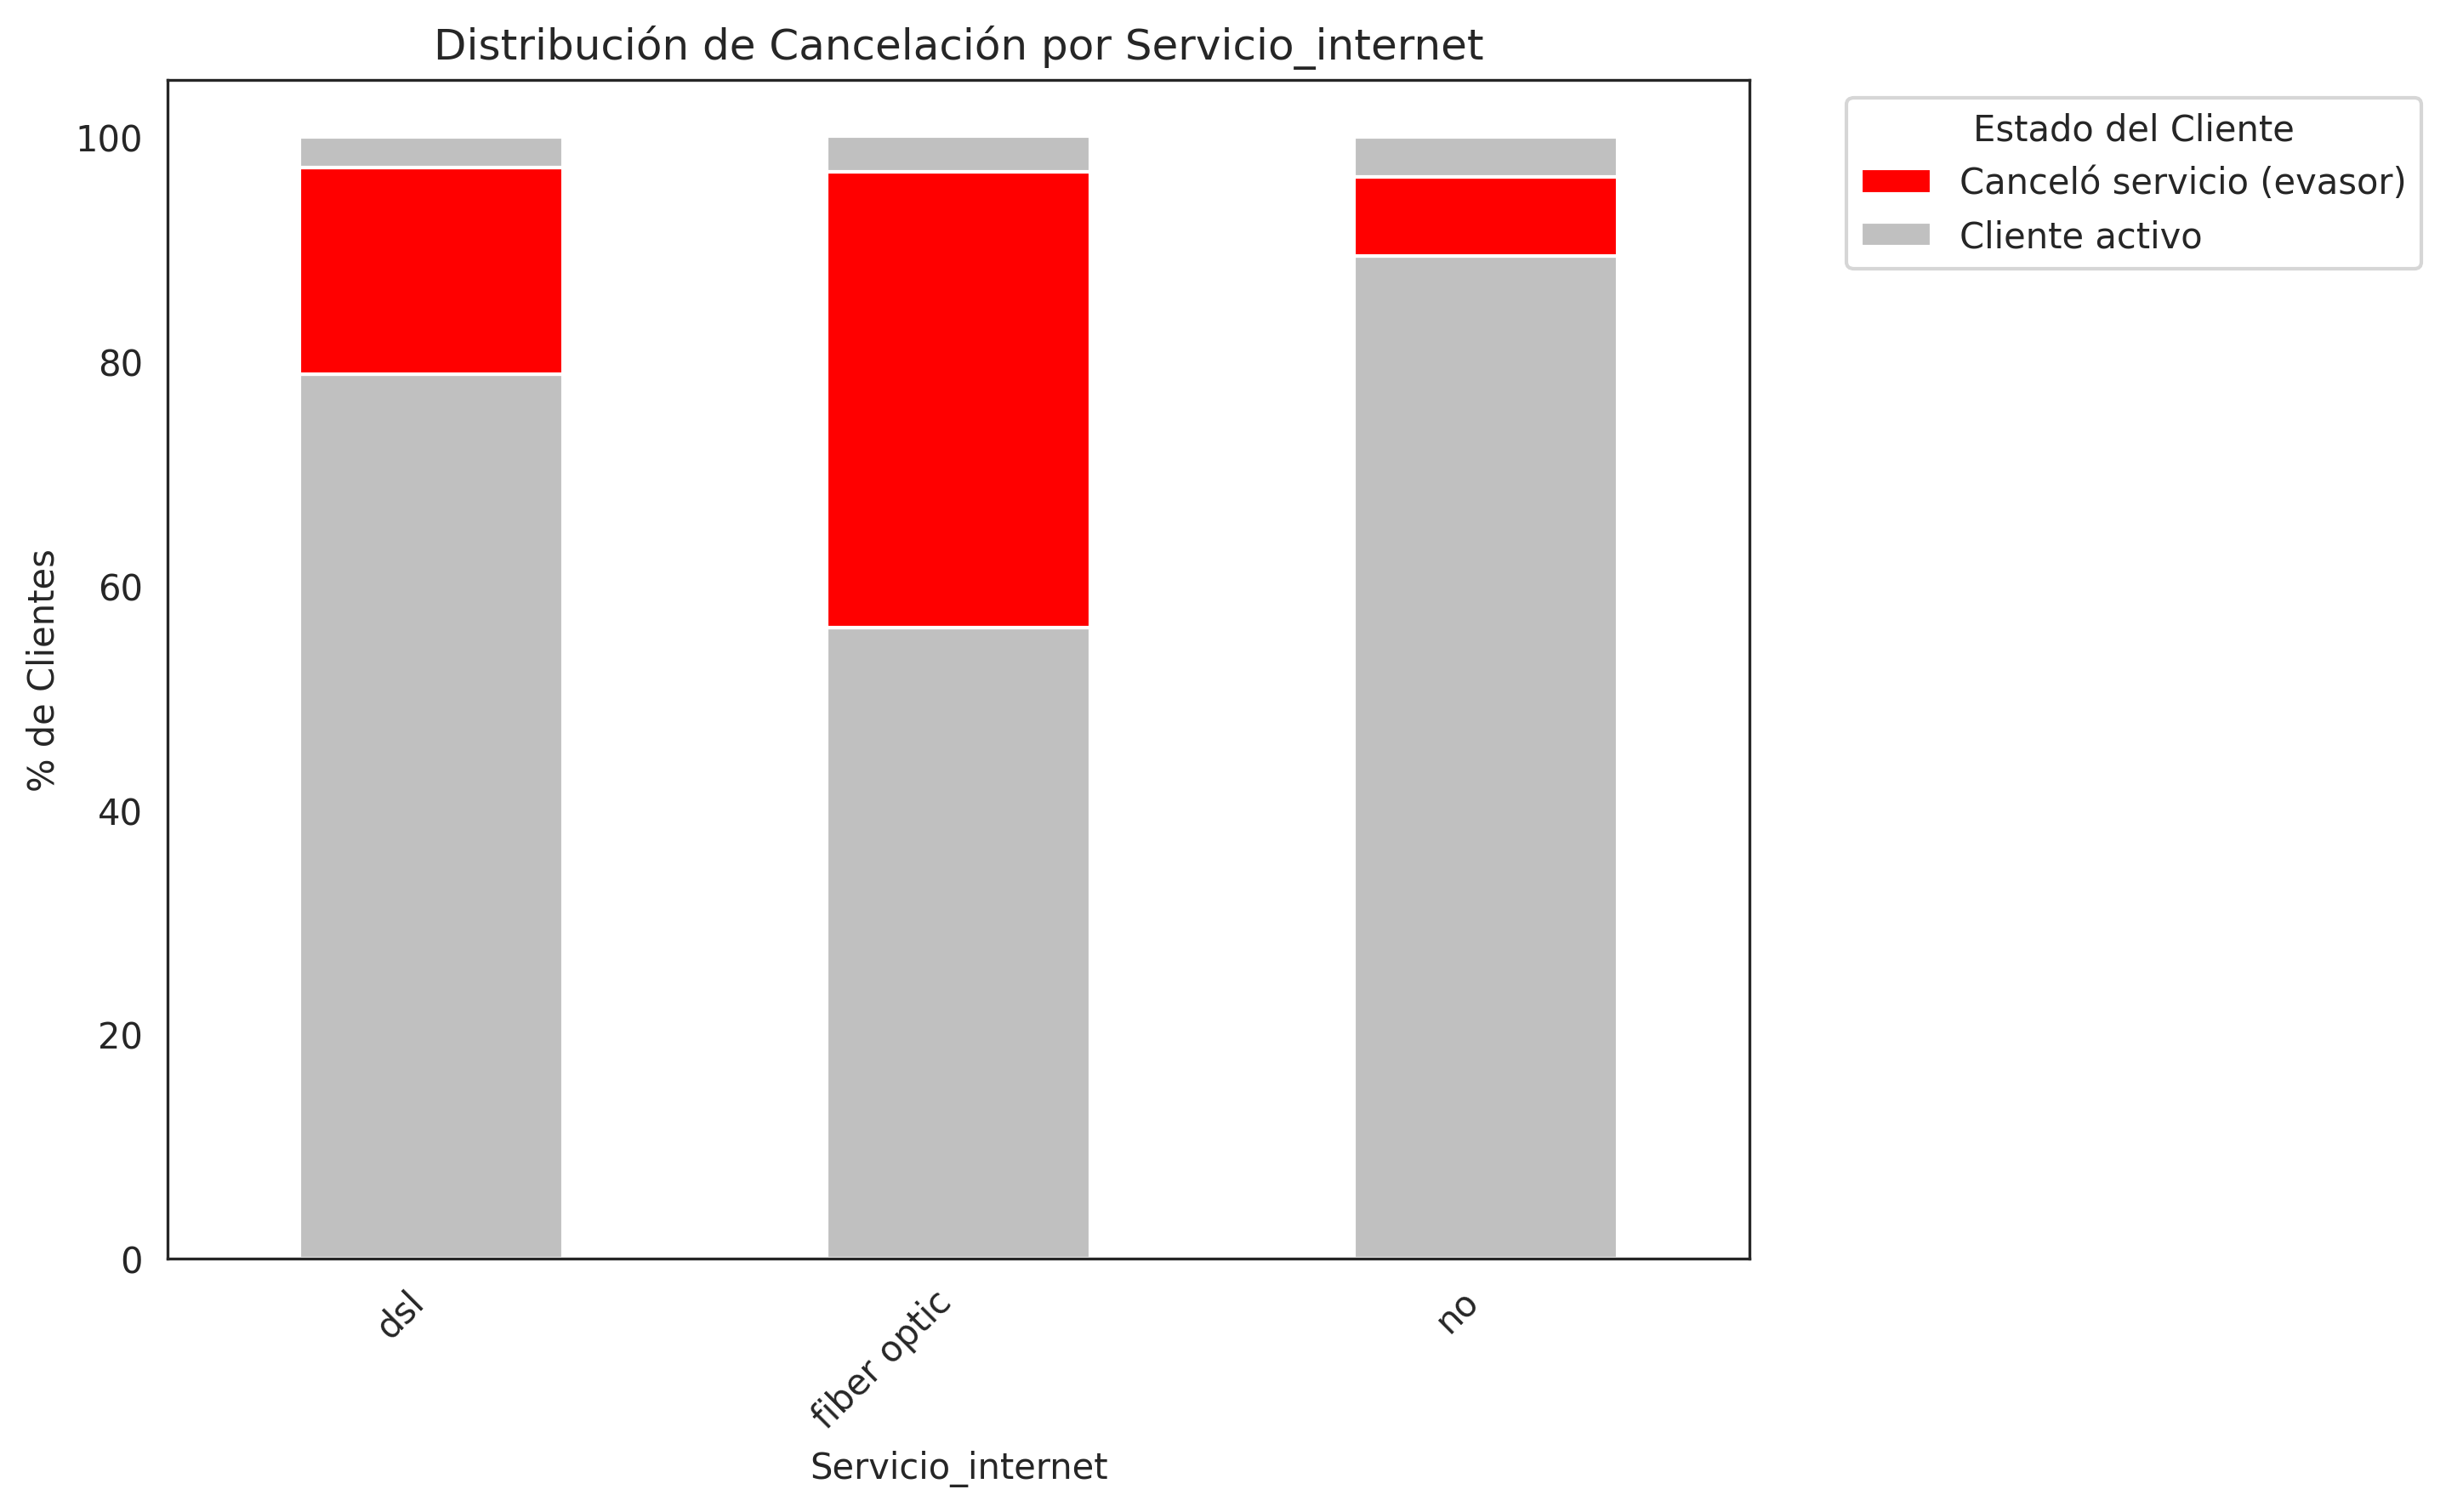

In [29]:
Image('servicio_internet.png')

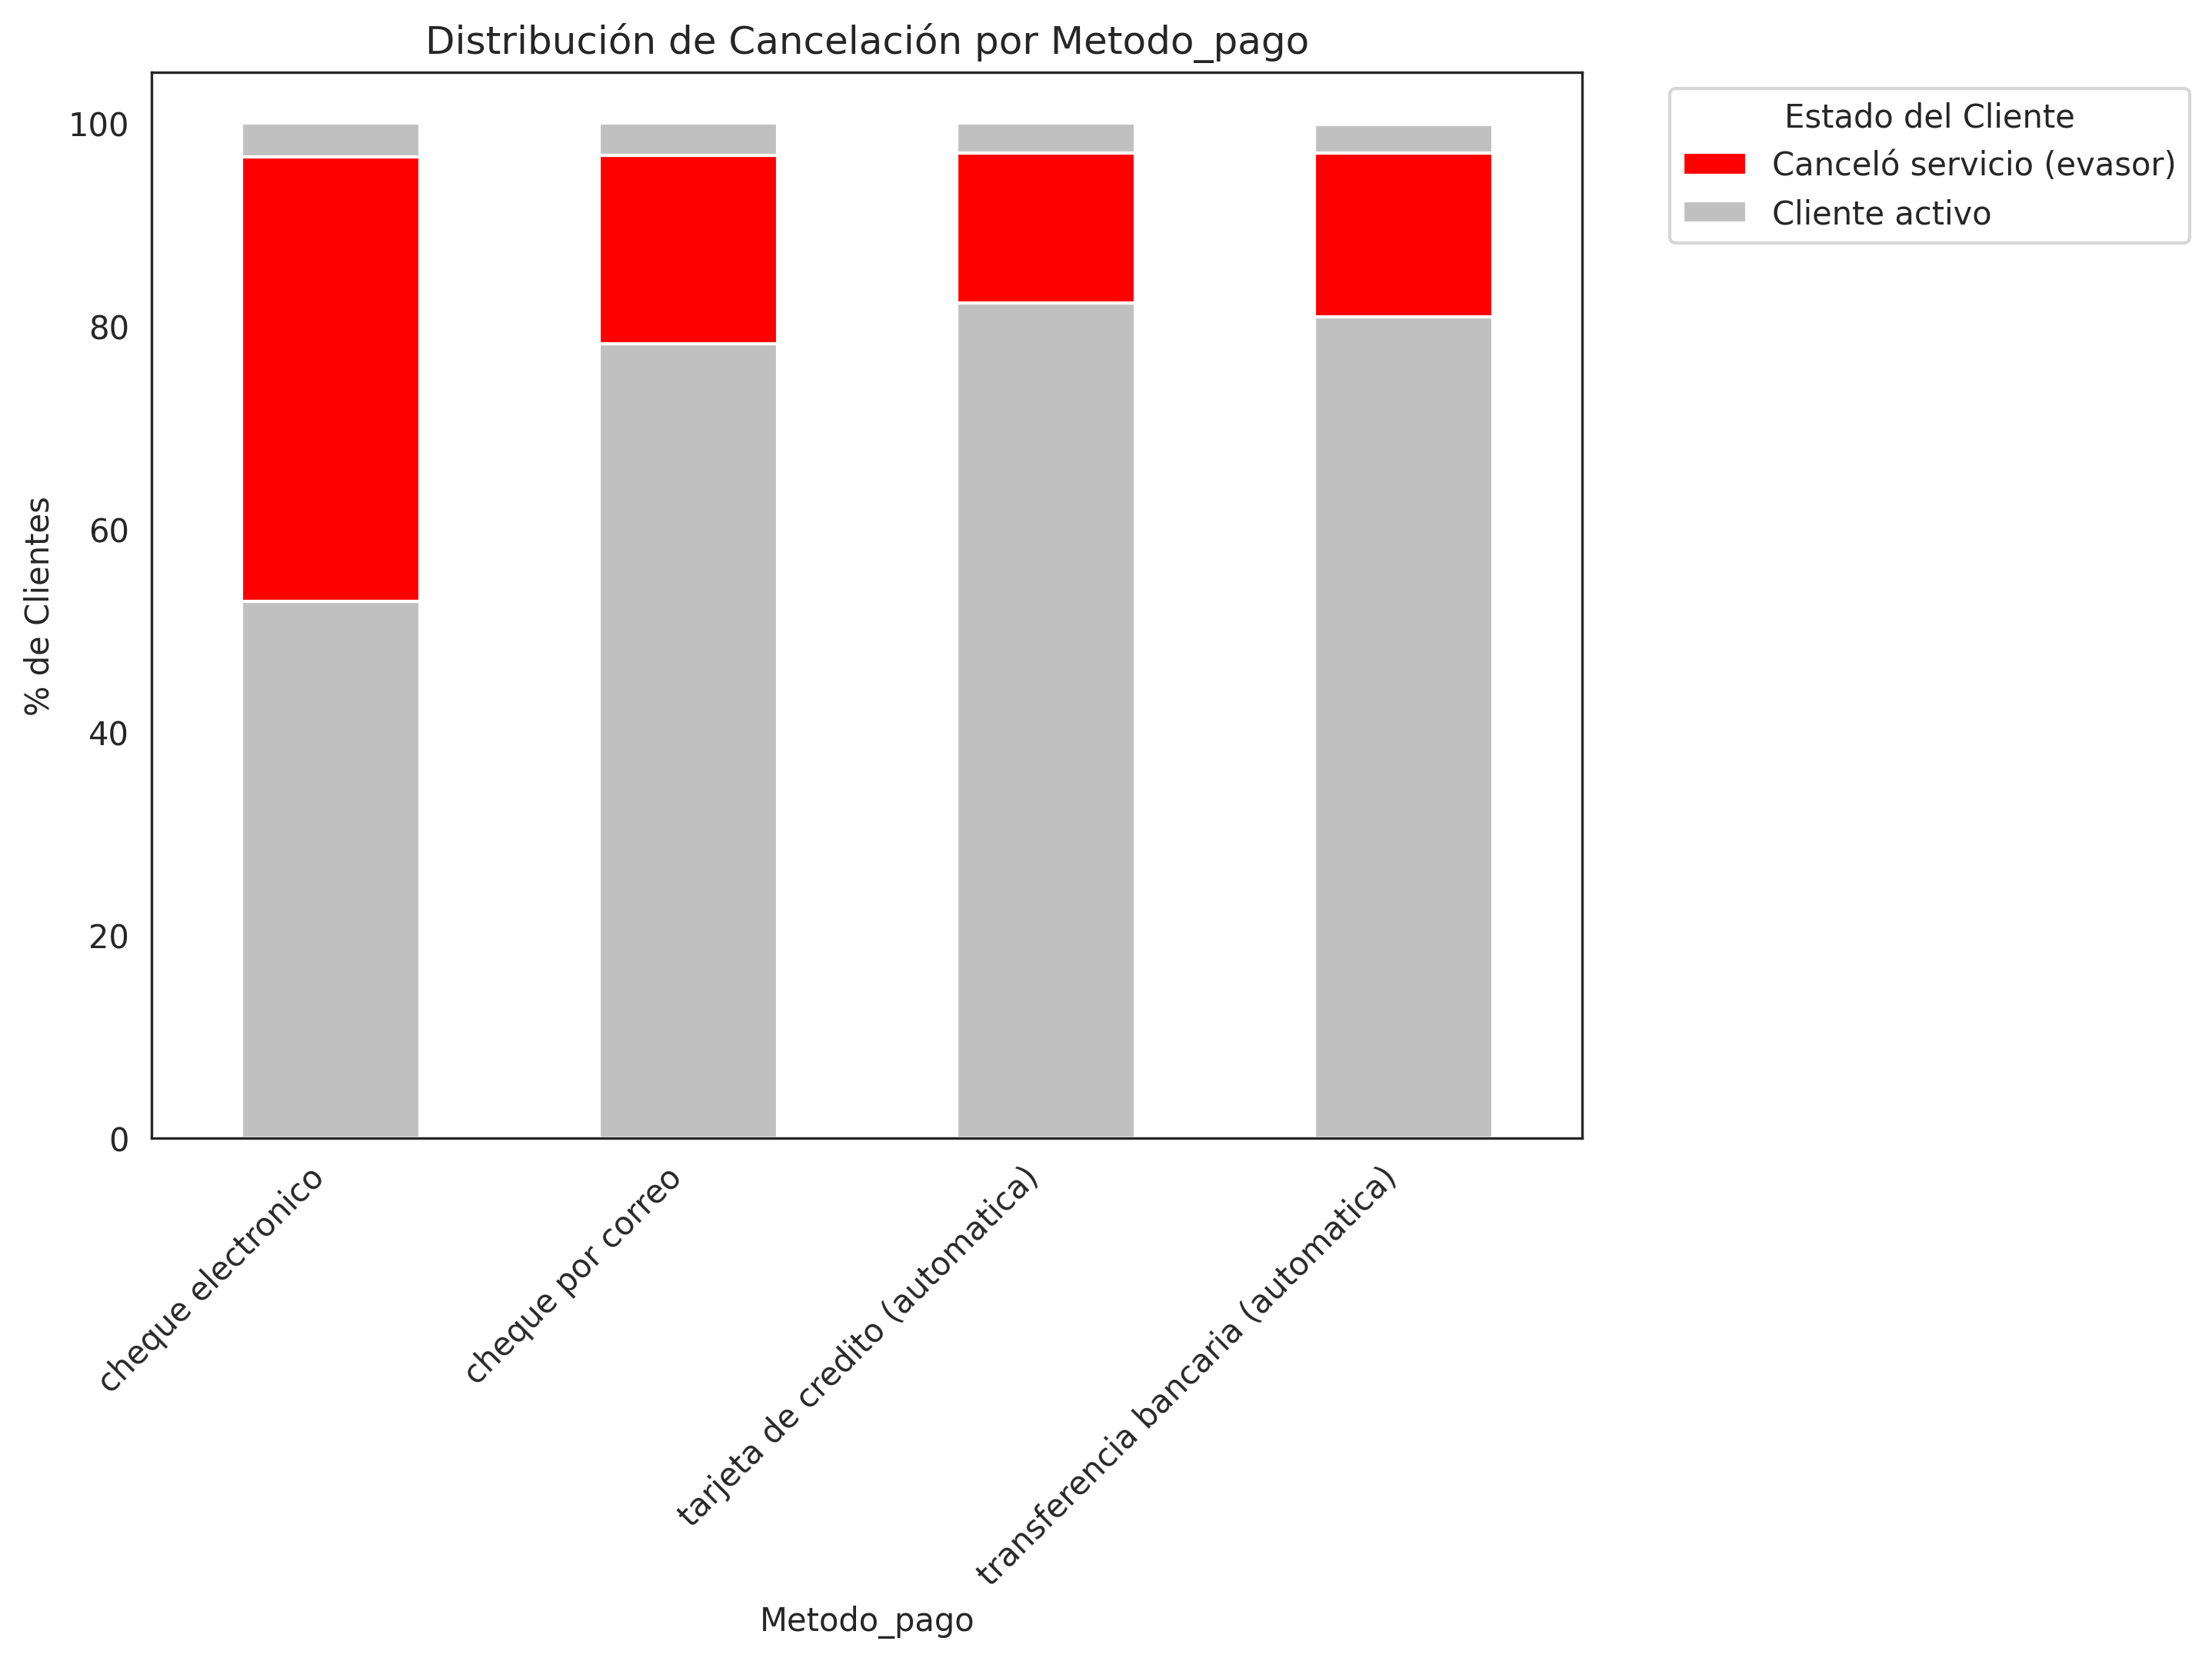

In [30]:
Image('metodo_pago.png')


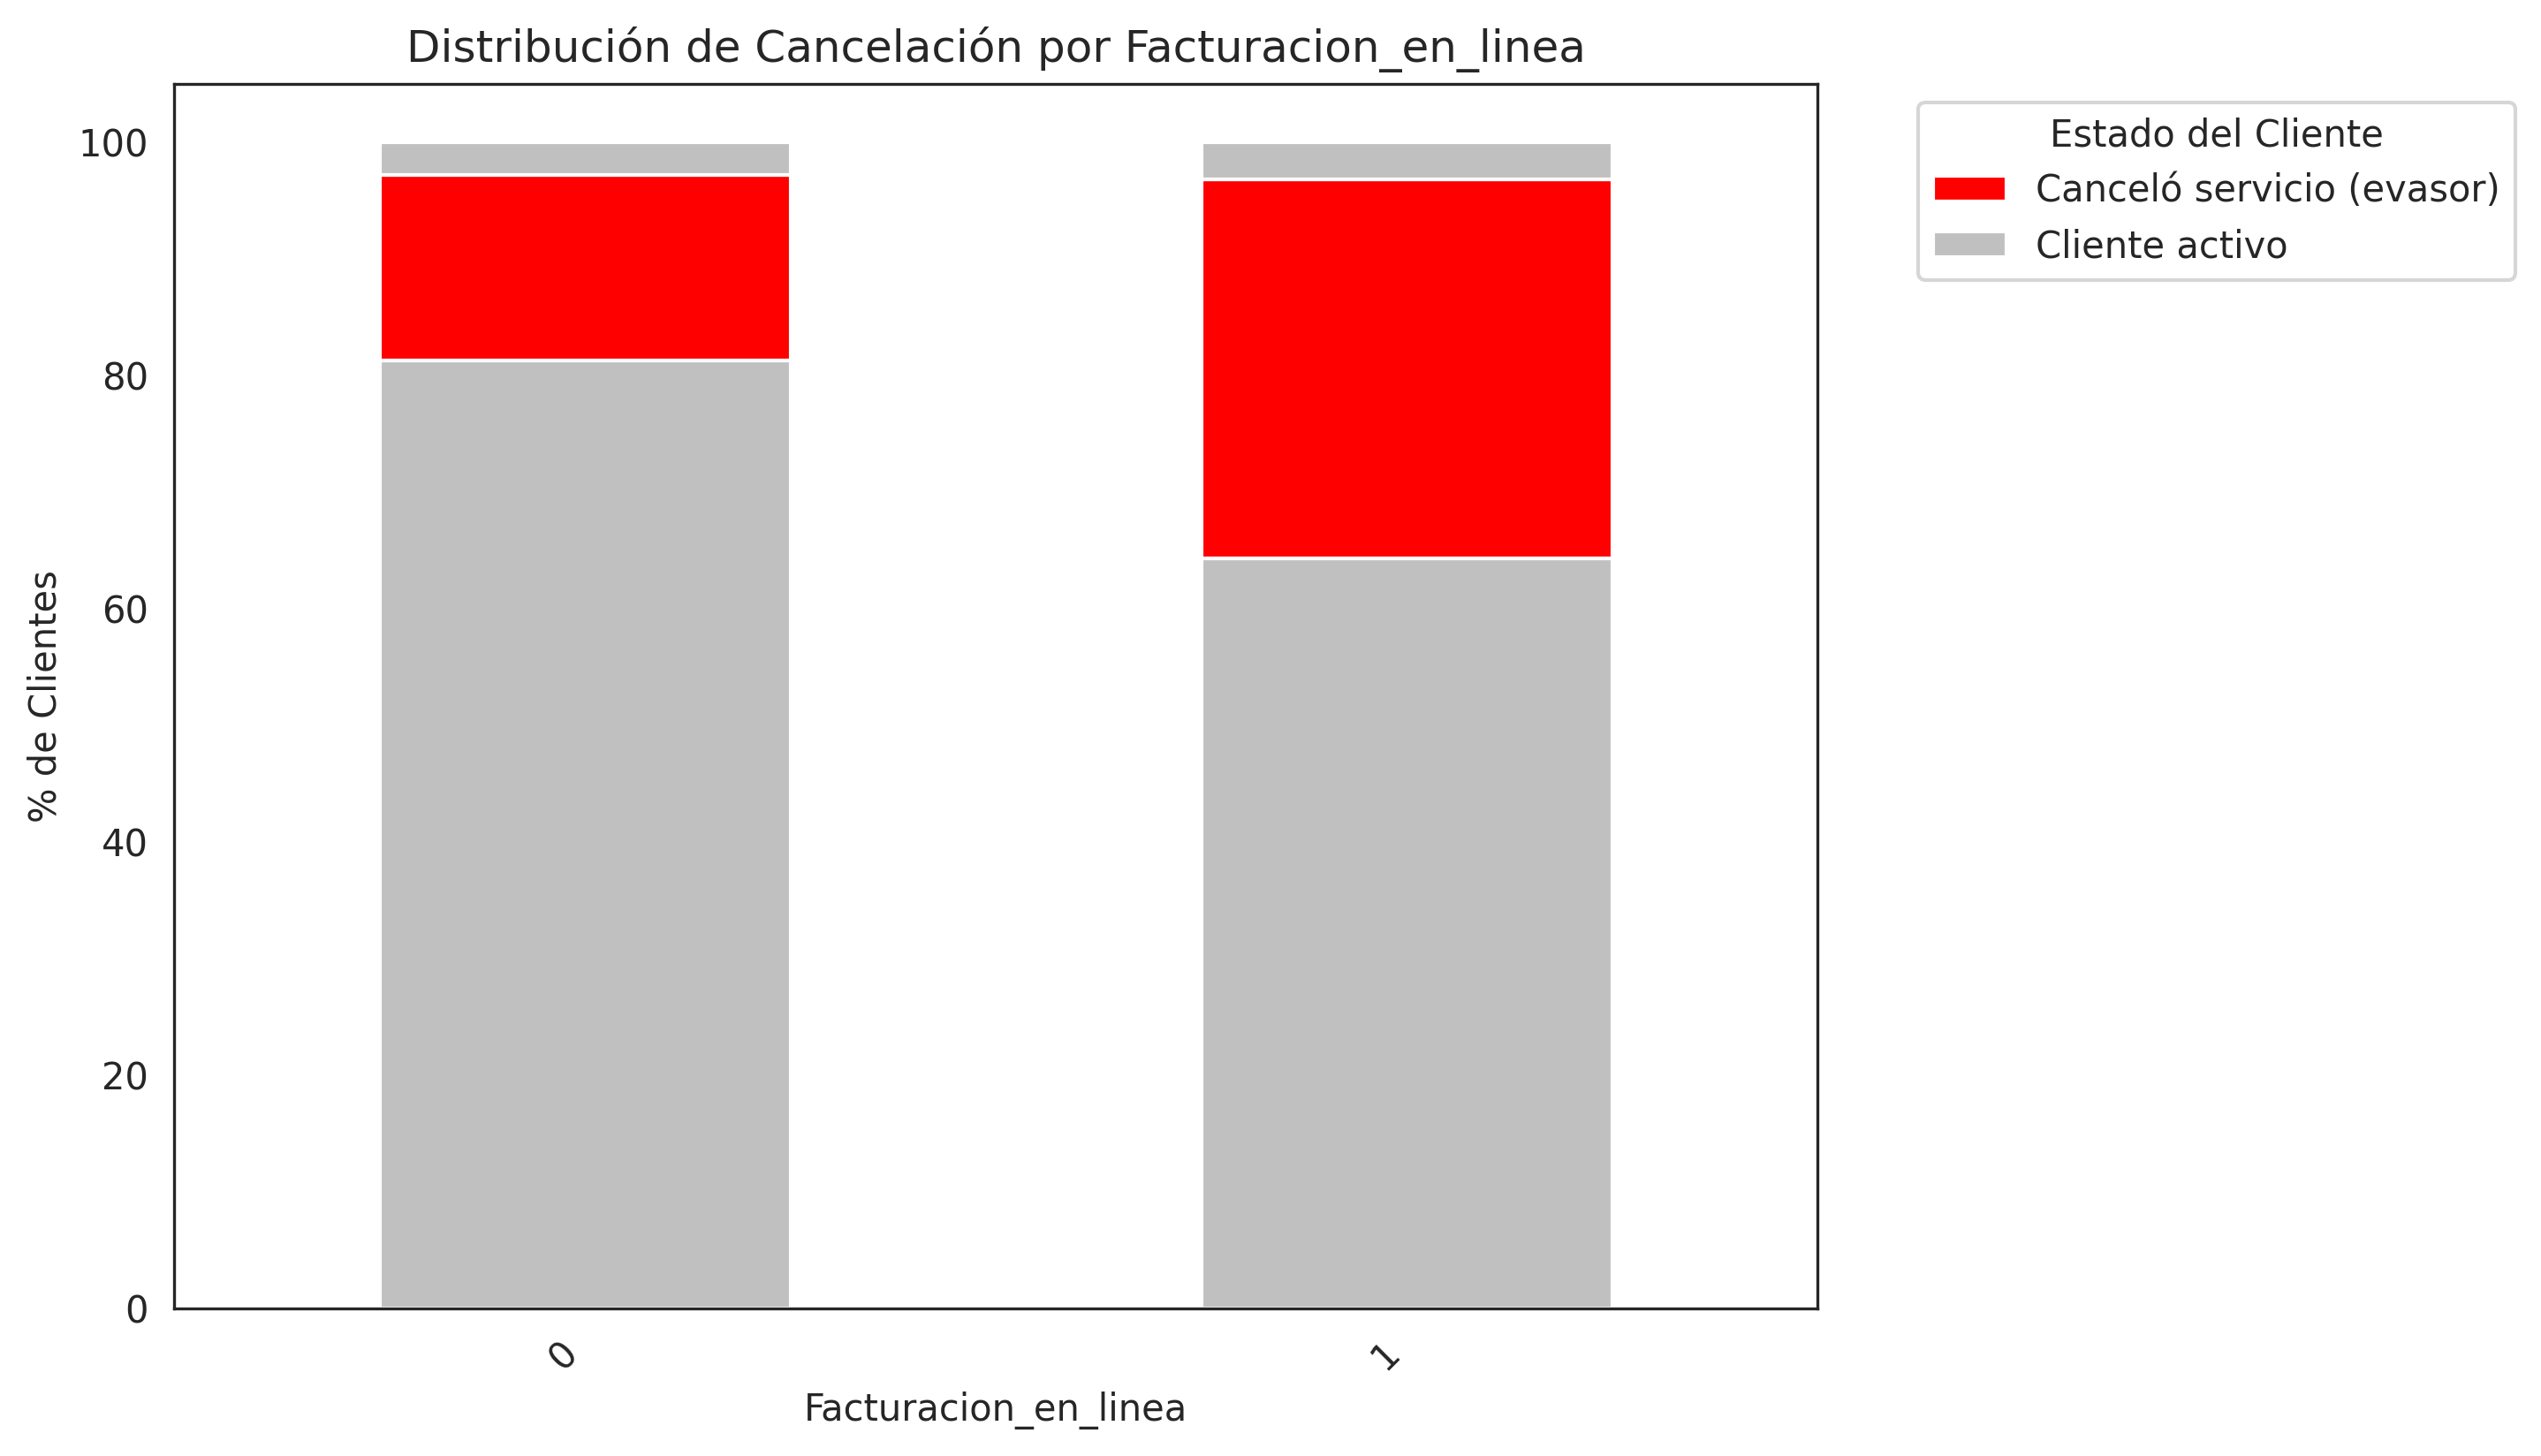

In [31]:
Image('facturacion_en_linea.png')

**Datos destacados:**

-- El churn es mucho más alto en contratos mensuales comparado con anuales.

-- Usuarios sin pareja o dependientes tienen mayor evasión.

-- Pagos mediante cheque electrónico y facturación electrónica se asocian a más cancelaciones.

**C. Churn según variables numéricas**

Se agruparon variables como:

-- meses_contrato, cargos_mensuales, cargos_totales, Cuentas_Diarias

Con:

-- Rangos (bins) y distribución porcentual por grupo (pd.cut() + groupby() + value_counts()).

-- Gráficos de barras apiladas para visualizar cómo se distribuye la cancelación entre los rangos.

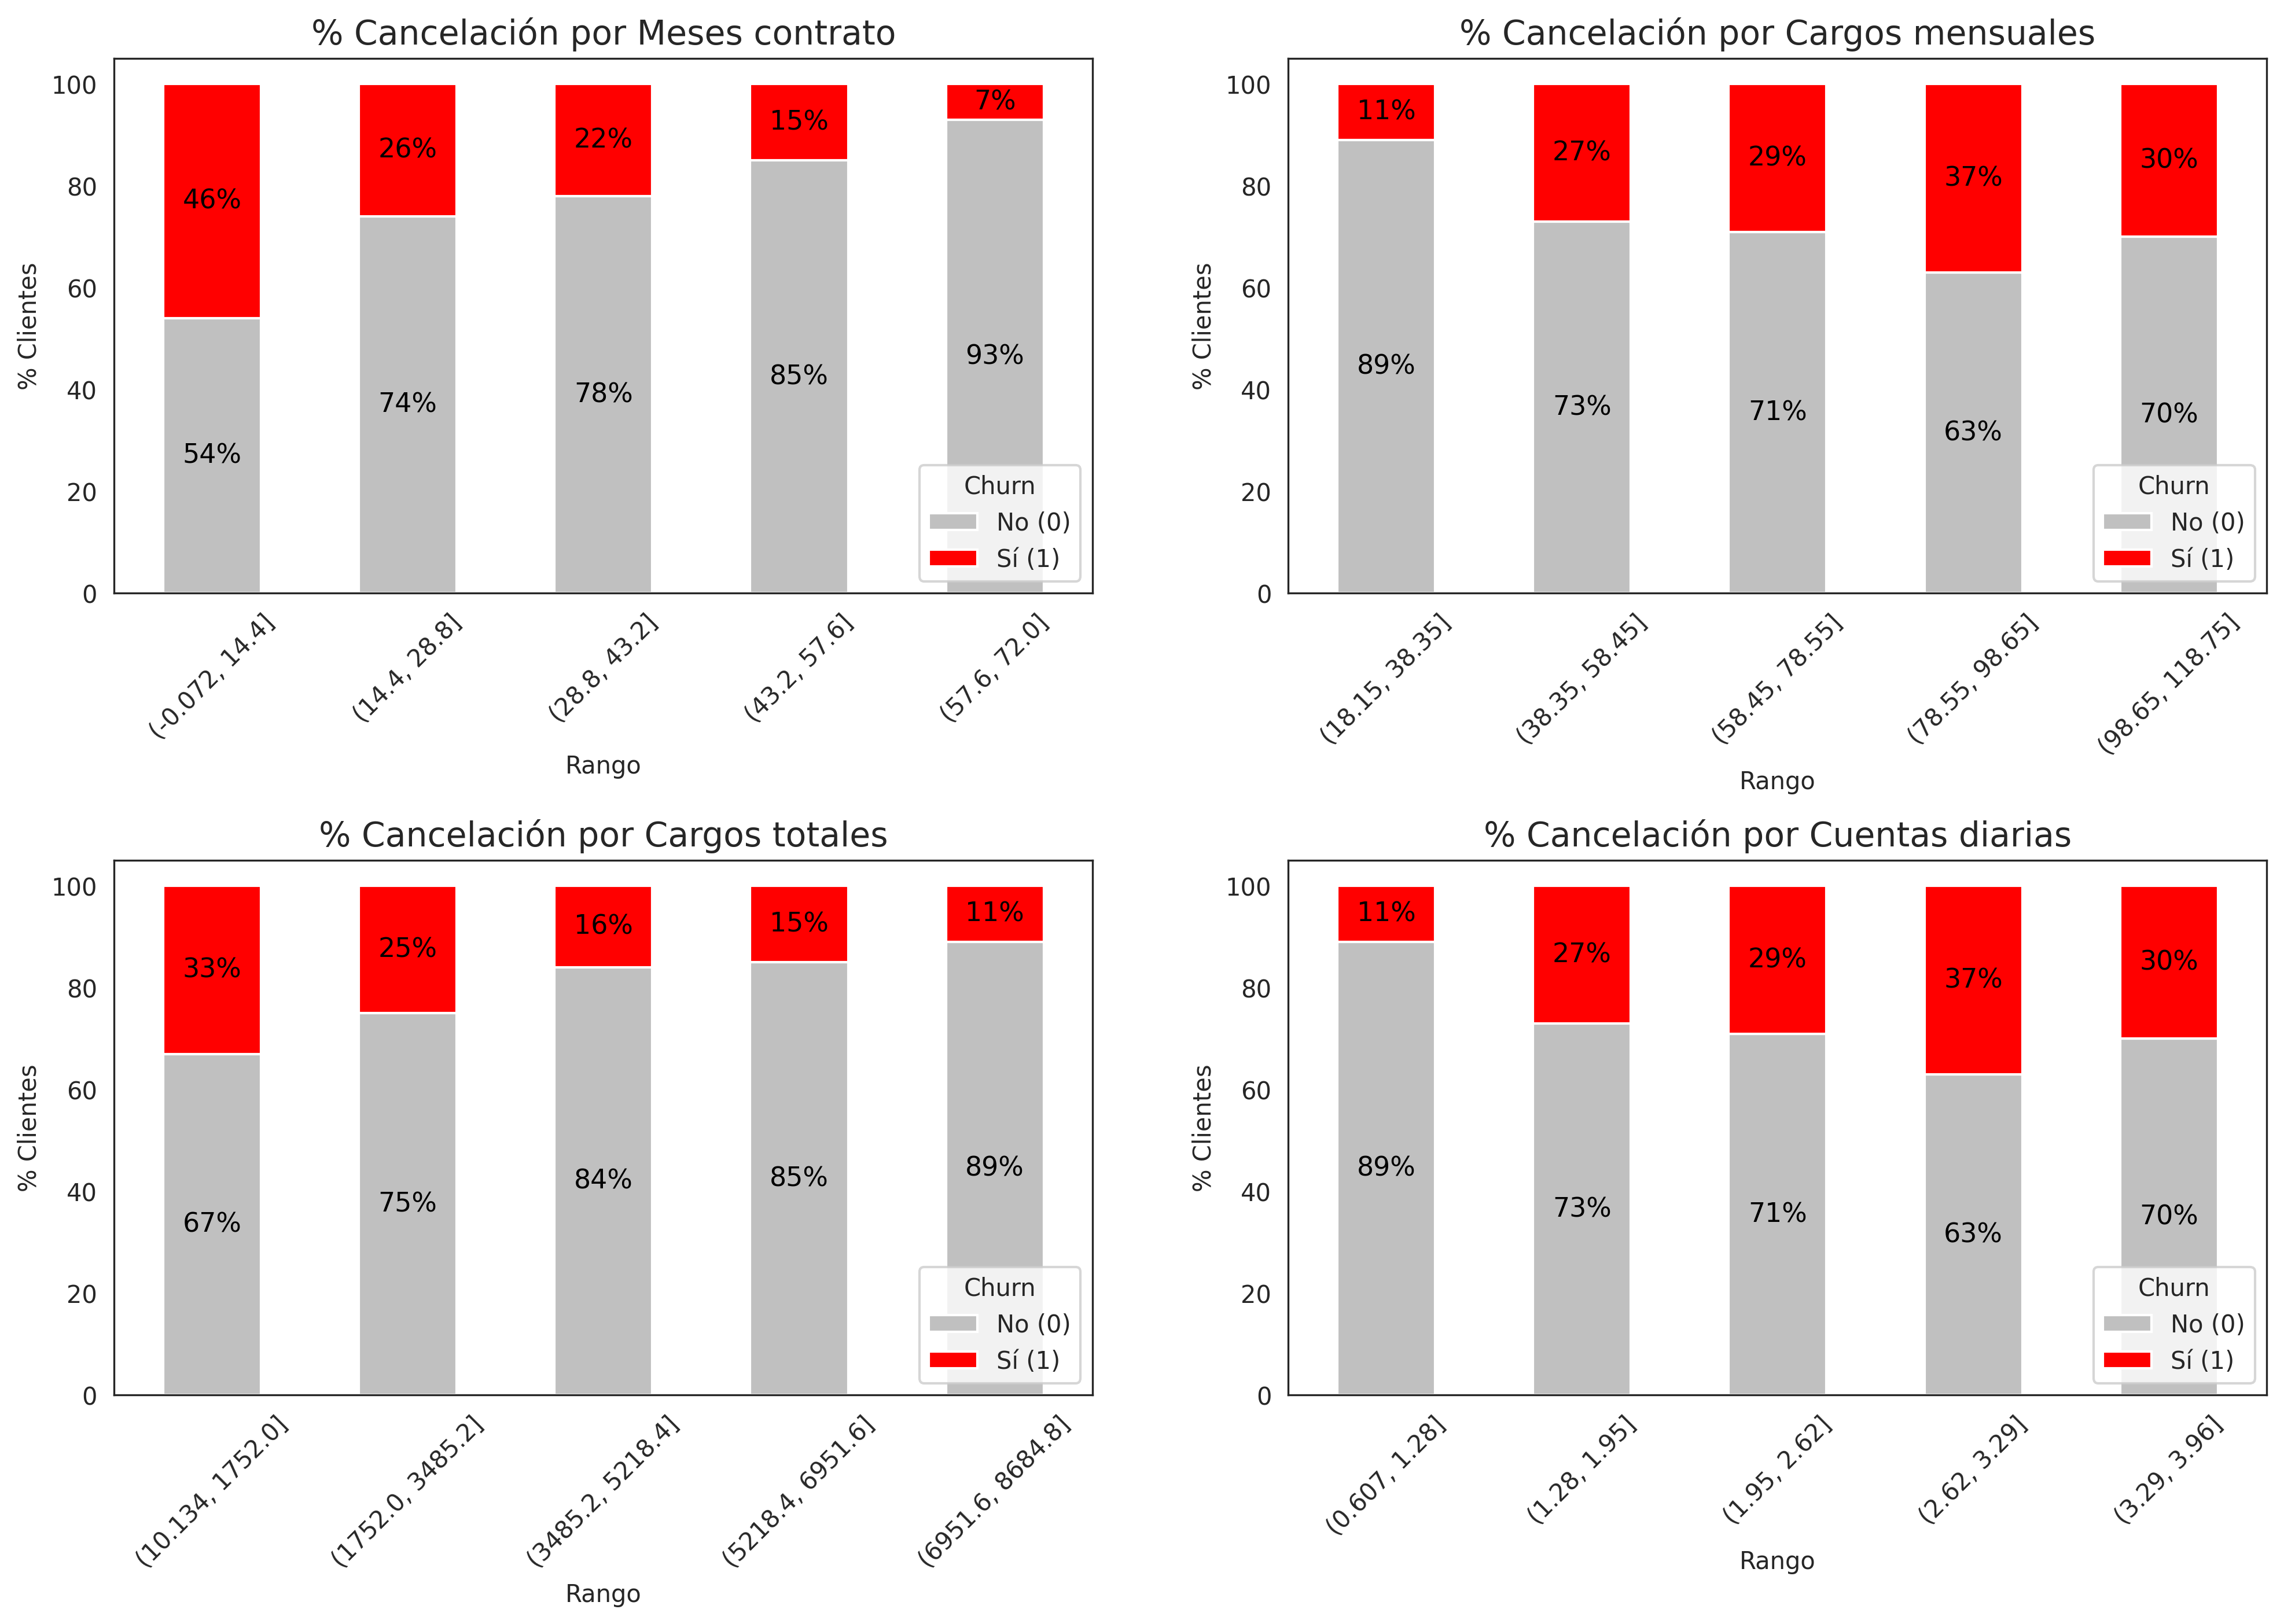

In [32]:
Image('porcentajes.png')

**Datos destacados:**

-- Los clientes con menos meses de contrato tienen tasas de evasión muy superiores (hasta 46%).

-- A mayor cargos mensuales, también mayor churn (usuarios que pagan más, cancelan más).

-- Usuarios con cargos totales más bajos son los que más desertan, podrían ser clientes nuevos.

## Conclusiones e Insights

**-- La cancelación está fuertemente asociada a contratos cortos y valores mensuales altos.**

**-- Clientes sin vínculo afectivo o familiar (pareja/dependientes) tienden a abandonar más.**

**-- El método de pago parece influir: medios más automáticos como tarjeta de crédito se asocian a menor churn.**

**-- La duración de la relación con el cliente (meses de contrato) es un factor predictivo clave.**

## Recomendaciones

**-- Fomentar contratos anuales con descuentos o beneficios adicionales.**

**-- Ofrecer incentivos de retención a nuevos clientes en los primeros 3 meses.**

**-- Revisar planes con cargos mensuales altos especialmente en usuarios con bajo uso total.**

**-- Mejorar la atención personalizada para clientes sin pareja/dependientes (posiblemente más exigentes o independientes).**

**-- Analizar medios de pago más amigables para automatizar el proceso y reducir fricciones.**

# Extra


## Análisis de correlación entre variables

In [33]:
columnas_a_usar = variables_numericas + ['churn']
correlaciones = df_filtrado[columnas_a_usar].corr()
print(correlaciones)

                  meses_contrato  cargos_mensuales  cargos_totales  \
meses_contrato          1.000000          0.247900        0.825880   
cargos_mensuales        0.247900          1.000000        0.651065   
cargos_totales          0.825880          0.651065        1.000000   
Cuentas_Diarias         0.247910          0.999996        0.651080   
churn                  -0.352229          0.193356       -0.199484   

                  Cuentas_Diarias     churn  
meses_contrato           0.247910 -0.352229  
cargos_mensuales         0.999996  0.193356  
cargos_totales           0.651080 -0.199484  
Cuentas_Diarias          1.000000  0.193412  
churn                    0.193412  1.000000  


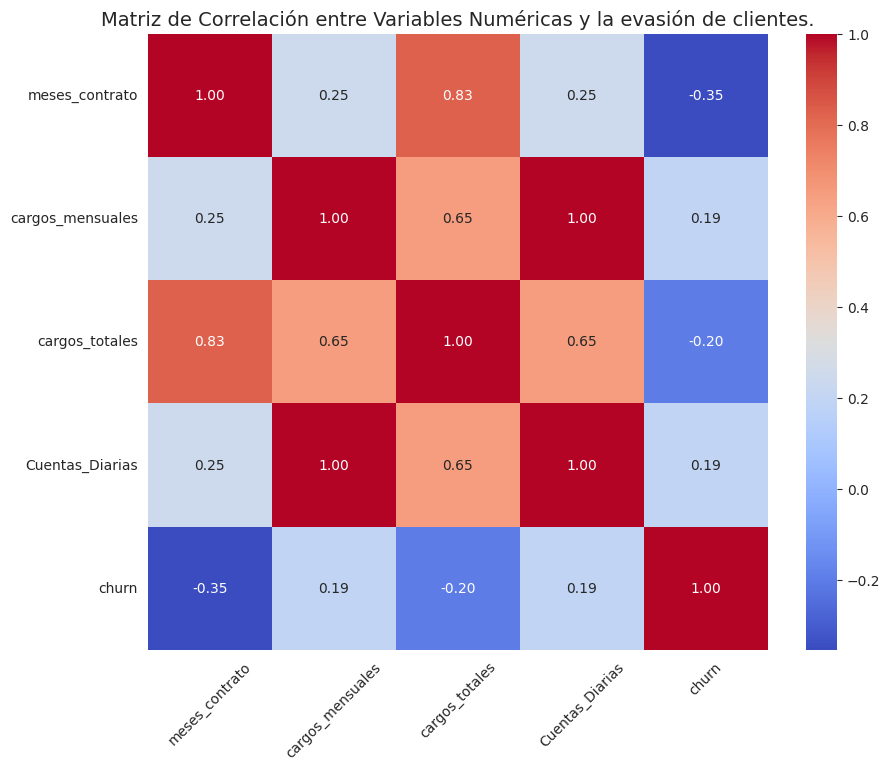

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas y la evasión de clientes.", fontsize=14)
plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)
plt.show()

**Informacion que nos brinda en analisis y la matriz de correlaciones.**

--Diagonal principal (de arriba a la izquierda hasta abajo a la derecha):
Siempre es 1, porque cada variable está correlacionada consigo misma.

--Variables con alta correlación positiva (color rojo fuerte):
Indican que a mayor valor de una variable, también crece la otra.

-- Variables con correlación negativa (azul oscuro):
Indican que cuando una sube, la otra baja.

--Ejemplo:
meses_contrato ↔ churn: a más meses de contrato, menos evasión.

**Información que extraemos para el análisis de evasión:**

-- las correlaciones con Churn más importantes son:

meses_contrato	 -0.35

cargos_totales	 -0.20

cargos_mensuales +0.19

cuentas_diarias	 +0.19

**Esto nos indica:**

-- Clientes con menos meses de contrato tienen más probabilidad de abandonar el servicio.

-- Cargos mensuales más altos y costos diarios más altos se asocian a mayor evasión.

-- Cargos totales más altos se asocian a menor evasión (clientes antiguos).